In [3]:
#Import main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [4]:
excelfilepath=('../data/YAWAR_solodata_20240416.xlsx')

In [5]:
df_yawar=pd.read_excel(excelfilepath)

## Data Exploration (Initial EDA and data cleaning)

- Understanding variables
- Clean the dataset (missing data, redundant data, outliers) 

In [6]:
df_yawar.shape

(84, 36)

In [7]:
df_yawar.columns

Index(['#', 'Año', 'FECHA (dd/mm/aaaa)', 'TIPO ACTIVIDAD (taller, difusion)',
       'FORMATO (presencial/virtual)', 'ACTIVIDAD', 'CANTIDAD', 'PAIS',
       'CIUDAD', 'ALCANCE\n(nal e internal)', 'LOCALIDAD', 'LUGAR',
       'TIPO DE AREA (RURAL/URBANA/PERIURBANA)',
       'TIPO DE ESTABLECIMIENTO (GENERICO)', 'OBS',
       'CANTIDAD DE PERSONAS ALCANZADAS', 'EDAD',
       'TIPO POBLACION (mujeres, jovenes, niñas)', 'VULNERABILIDAD',
       'DOTACIÓN INSUMOS', 'toallas desechables', 'copas menstruales',
       'toallas reutilizables', 'calzones menstruales',
       'Kits Insumos de Gestión Menstrual', 'Q'ipus menstruales',
       'DURACION EXPO + PREGUNTAS (MIN)', 'TEMATICA TALLER',
       'PERSONAS A CARGO (CAPACITADORAS, ETC)', 'Nro. VOLUNTARIAS PRESENTES',
       'TIEMPO DE PREPARACION Y CIERRE (MIN)', 'IMPACTO(ALTO, MEDIO , BAJO)',
       'ENCUESTA SOBRE CONOCIMIENTO PREVIO DE MENSTRUACION (si/no)',
       'ENCUESTA POSTERIOR DE APRENDIZAJES',
       'FINANCIADOR O ORG. ALIADA si h

In [8]:
df_yawar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 36 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   #                                                           83 non-null     float64
 1   Año                                                         81 non-null     float64
 2   FECHA (dd/mm/aaaa)                                          81 non-null     object 
 3   TIPO ACTIVIDAD (taller, difusion)                           84 non-null     object 
 4   FORMATO (presencial/virtual)                                82 non-null     object 
 5   ACTIVIDAD                                                   84 non-null     object 
 6   CANTIDAD                                                    83 non-null     float64
 7   PAIS                                                        83 non-null     object 
 8   CI

In [9]:
df_yawar.dtypes

#                                                             float64
Año                                                           float64
FECHA (dd/mm/aaaa)                                             object
TIPO ACTIVIDAD (taller, difusion)                              object
FORMATO (presencial/virtual)                                   object
ACTIVIDAD                                                      object
CANTIDAD                                                      float64
PAIS                                                           object
CIUDAD                                                         object
ALCANCE\n(nal e internal)                                      object
LOCALIDAD                                                      object
LUGAR                                                          object
TIPO DE AREA (RURAL/URBANA/PERIURBANA)                         object
TIPO DE ESTABLECIMIENTO (GENERICO)                             object
OBS                 

In [10]:
df_yawar.describe()

,#,Año,CANTIDAD,CANTIDAD DE PERSONAS ALCANZADAS,"PERSONAS A CARGO (CAPACITADORAS, ETC)",Nro. VOLUNTARIAS PRESENTES,TIEMPO DE PREPARACION Y CIERRE (MIN),"IMPACTO(ALTO, MEDIO , BAJO)"
count,83.000000,81.000000,83.000000,50.000000,45.000000,53.000000,52.000000,0.0
mean,42.000000,2022.246914,3.349398,15.320000,1.133333,2.075472,393.269231,NaN
std,24.103942,0.623114,13.975967,8.262134,0.504525,2.947287,73.557265,NaN
min,1.000000,2021.000000,1.000000,5.000000,1.000000,0.000000,300.000000,NaN
25%,21.500000,2022.000000,1.000000,8.000000,1.000000,0.000000,330.000000,NaN
50%,42.000000,2022.000000,1.000000,13.000000,1.000000,1.000000,330.000000,NaN
75%,62.500000,2023.000000,1.000000,20.000000,1.000000,4.000000,480.000000,NaN
max,83.000000,2024.000000,116.000000,35.000000,4.000000,10.000000,480.000000,NaN


In [11]:
df_yawar.head(10)

,#,Año,FECHA (dd/mm/aaaa),"TIPO ACTIVIDAD (taller, difusion)",FORMATO (presencial/virtual),ACTIVIDAD,CANTIDAD,PAIS,CIUDAD,ALCANCE\n(nal e internal),...,DURACION EXPO + PREGUNTAS (MIN),TEMATICA TALLER,"PERSONAS A CARGO (CAPACITADORAS, ETC)",Nro. VOLUNTARIAS PRESENTES,TIEMPO DE PREPARACION Y CIERRE (MIN),"IMPACTO(ALTO, MEDIO , BAJO)",ENCUESTA SOBRE CONOCIMIENTO PREVIO DE MENSTRUACION (si/no),ENCUESTA POSTERIOR DE APRENDIZAJES,FINANCIADOR O ORG. ALIADA si hubiera existido,"DETALLES DE LA ACTIVIDAD (links, obs, etc.)"
0,1.0,2022.0,2022-03-10 00:00:00,taller,presencial,1er encuentro voluntarias,1.0,Bolivia,El Alto,Nacional,...,210,historia de nuestra sexualidad y anatomia,1.0,0.0,480.0,NaN,No,No,No,NaN
1,2.0,2022.0,2022-04-09 00:00:00,taller,presencial,Taller: qué es ser joven?,1.0,Bolivia,La Paz,La Paz,...,210,Qué es ser joven?,2.0,0.0,400.0,NaN,No,No,No,NaN
2,3.0,2022.0,2022-07-07 00:00:00,taller,presencial,ALTO ALDEAS,1.0,Bolivia,El Alto,Nacional,...,210,vivencia menstrual-ovulatoria,1.0,5.0,480.0,NaN,No,No,Aptapi Jopueti,https://www.instagram.com/reel/CfzpDw5JOq8/?ut...
3,4.0,2022.0,2022-07-08 00:00:00,taller,presencial,ALTO ALDEAS,1.0,Bolivia,El Alto,Nacional,...,210,vivencia menstrual-ovulatoria,1.0,5.0,480.0,NaN,No,No,Aptapi Jopueti,https://www.instagram.com/reel/CfzpDw5JOq8/?ut...
4,5.0,2022.0,2022-07-09 00:00:00,taller,presencial,ALTO MAPAKI,1.0,Bolivia,El Alto,Nacional,...,210,vivencia menstrual-ovulatoria,1.0,3.0,480.0,NaN,No,No,Aptapi Jopueti,https://www.instagram.com/reel/Cf_sL5IjUyb/?ut...
5,6.0,2022.0,2023-09-06 00:00:00,taller,presencial,PROYECTO SOCIAL JASAYÉ,1.0,Bolivia,Beni,Nacional,...,210,vivencia menstrual-ovulatoria,1.0,0.0,330.0,NaN,No,No,Proyecto Social Jasayé,https://www.instagram.com/reel/CiNhmCgDcRC/?ut...
6,7.0,2022.0,2022-09-08 00:00:00,taller,presencial,PROYECTO SOCIAL JASAYÉ,1.0,Bolivia,Beni,Nacional,...,210,vivencia menstrual-ovulatoria,1.0,0.0,330.0,NaN,No,No,Proyecto Social Jasayé,NaN
7,8.0,2022.0,2022-09-12 00:00:00,taller,presencial,PROYECTO SOCIAL JASAYÉ,1.0,Bolivia,Beni,Nacional,...,210,vivencia menstrual-ovulatoria,1.0,0.0,330.0,NaN,No,No,Proyecto Social Jasayé,NaN
8,9.0,2022.0,2022-09-15 00:00:00,taller,presencial,PROYECTO SOCIAL JASAYÉ,1.0,Bolivia,Beni,Nacional,...,210,vivencia menstrual-ovulatoria,1.0,0.0,330.0,NaN,No,No,Proyecto Social Jasayé,NaN
9,10.0,2022.0,2022-06-24 00:00:00,taller,virtual,ESCUELITA VIRTUAL,1.0,Bolivia,El Alto,Nacional,...,210,historia de nuestra sexualidad y anatomia,1.0,0.0,330.0,NaN,No,No,NaN,NaN


### Rename Columns

In [226]:
#Make a copy of the dataset to work on it and keep the original.
df_yawar_c=df_yawar.copy()

In [227]:
df_yawar_c.sample(3)

,#,Año,FECHA (dd/mm/aaaa),"TIPO ACTIVIDAD (taller, difusion)",FORMATO (presencial/virtual),ACTIVIDAD,CANTIDAD,PAIS,CIUDAD,ALCANCE\n(nal e internal),...,DURACION EXPO + PREGUNTAS (MIN),TEMATICA TALLER,"PERSONAS A CARGO (CAPACITADORAS, ETC)",Nro. VOLUNTARIAS PRESENTES,TIEMPO DE PREPARACION Y CIERRE (MIN),"IMPACTO(ALTO, MEDIO , BAJO)",ENCUESTA SOBRE CONOCIMIENTO PREVIO DE MENSTRUACION (si/no),ENCUESTA POSTERIOR DE APRENDIZAJES,FINANCIADOR O ORG. ALIADA si hubiera existido,"DETALLES DE LA ACTIVIDAD (links, obs, etc.)"
1,2.0,2022.0,2022-04-09 00:00:00,taller,presencial,Taller: qué es ser joven?,1.0,Bolivia,La Paz,La Paz,...,210,Qué es ser joven?,2.0,0.0,400.0,NaN,No,No,No,NaN
6,7.0,2022.0,2022-09-08 00:00:00,taller,presencial,PROYECTO SOCIAL JASAYÉ,1.0,Bolivia,Beni,Nacional,...,210,vivencia menstrual-ovulatoria,1.0,0.0,330.0,NaN,No,No,Proyecto Social Jasayé,NaN
65,65.0,2022.0,2022-03-21 00:00:00,campaña,virtual,Alianza calzones menstruales con Aura,1.0,Bolivia,NaN,Nacional,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Lowercase column names

In [14]:
df_yawar_c.columns

Index(['#', 'Año', 'FECHA (dd/mm/aaaa)', 'TIPO ACTIVIDAD (taller, difusion)',
       'FORMATO (presencial/virtual)', 'ACTIVIDAD', 'CANTIDAD', 'PAIS',
       'CIUDAD', 'ALCANCE\n(nal e internal)', 'LOCALIDAD', 'LUGAR',
       'TIPO DE AREA (RURAL/URBANA/PERIURBANA)',
       'TIPO DE ESTABLECIMIENTO (GENERICO)', 'OBS',
       'CANTIDAD DE PERSONAS ALCANZADAS', 'EDAD',
       'TIPO POBLACION (mujeres, jovenes, niñas)', 'VULNERABILIDAD',
       'DOTACIÓN INSUMOS', 'toallas desechables', 'copas menstruales',
       'toallas reutilizables', 'calzones menstruales',
       'Kits Insumos de Gestión Menstrual', 'Q'ipus menstruales',
       'DURACION EXPO + PREGUNTAS (MIN)', 'TEMATICA TALLER',
       'PERSONAS A CARGO (CAPACITADORAS, ETC)', 'Nro. VOLUNTARIAS PRESENTES',
       'TIEMPO DE PREPARACION Y CIERRE (MIN)', 'IMPACTO(ALTO, MEDIO , BAJO)',
       'ENCUESTA SOBRE CONOCIMIENTO PREVIO DE MENSTRUACION (si/no)',
       'ENCUESTA POSTERIOR DE APRENDIZAJES',
       'FINANCIADOR O ORG. ALIADA si h

In [228]:
#lower case all column names
df_yawar_c.columns=df_yawar_c.columns.str.lower()

#### Modify column names

In [229]:
#Delete spaces among words
df_yawar_c.columns=df_yawar_c.columns.str.replace(' ','') 

In [230]:
df_yawar_c.rename(columns={'fecha(dd/mm/aaaa)':'fecha',
                           'tipoactividad(taller,difusion)':'tipo_actividad',
                           'formato(presencial/virtual)':'formato',
                           'alcance\n(naleinternal)':'alcance', 
                           'tipodearea(rural/urbana/periurbana)':'tipodearea',
                           'tipodeestablecimiento(generico)':'tipodeestablecimiento', 
                           'cantidaddepersonasalcanzadas':'personasalcanzadas_cant', 
                           'tipopoblacion(mujeres,jovenes,niñas)':'poblacion',
                           'kitsinsumosdegestiónmenstrual':'kit_insumos_gestiónmenstrual',
                           "q'ipusmenstruales":'qipusmenstruales',
                           'duracionexpo+preguntas(min)':'expo_duracion',
                           'personasacargo(capacitadoras,etc)':'personal',
                           'nro.voluntariaspresentes':'voluntarias', 
                           'tiempodepreparacionycierre(min)':'expo_tiempo_elabtaller',
                           'impacto(alto,medio,bajo)':'impacto',
                           'encuestasobreconocimientopreviodemenstruacion(si/no)':'encuesta_menstr',
                           'encuestaposteriordeaprendizajes':'encuesta_post_aprendizajes',
                           'financiadoroorg.aliadasihubieraexistido':'org_apoyo',
                           'detallesdelaactividad(links,obs,etc.)': 'detalles_actividad'
                                                                    
}, inplace=True)

In [231]:
df_yawar_c.columns

Index(['#', 'año', 'fecha', 'tipo_actividad', 'formato', 'actividad',
       'cantidad', 'pais', 'ciudad', 'alcance', 'localidad', 'lugar',
       'tipodearea', 'tipodeestablecimiento', 'obs', 'personasalcanzadas_cant',
       'edad', 'poblacion', 'vulnerabilidad', 'dotacióninsumos',
       'toallasdesechables', 'copasmenstruales', 'toallasreutilizables',
       'calzonesmenstruales', 'kit_insumos_gestiónmenstrual',
       'qipusmenstruales', 'expo_duracion', 'tematicataller', 'personal',
       'voluntarias', 'expo_tiempo_elabtaller', 'impacto', 'encuesta_menstr',
       'encuesta_post_aprendizajes', 'org_apoyo', 'detalles_actividad'],
      dtype='object')

### Check missing values

In [232]:
np.round((df_yawar_c.isna().sum()/df_yawar_c.shape[0]*100).sort_values(ascending=False),2)

impacto                         100.00
detalles_actividad               82.14
obs                              80.95
org_apoyo                        47.62
personal                         46.43
edad                             40.48
encuesta_post_aprendizajes       40.48
encuesta_menstr                  40.48
qipusmenstruales                 40.48
kit_insumos_gestiónmenstrual     40.48
calzonesmenstruales              40.48
toallasreutilizables             40.48
copasmenstruales                 40.48
toallasdesechables               40.48
dotacióninsumos                  40.48
poblacion                        40.48
vulnerabilidad                   40.48
personasalcanzadas_cant          40.48
tematicataller                   39.29
expo_duracion                    39.29
expo_tiempo_elabtaller           38.10
voluntarias                      36.90
localidad                        29.76
lugar                            28.57
tipodeestablecimiento            27.38
tipodearea               

Since 'impacto' column doesnt have any information, is better to delete that column.

In [233]:
df_yawar_c.drop(columns=['impacto'],axis=1, inplace=True)

Since 'detallesactividad' is a column which contains only social media links, for this reason this column should be deleted.
The same applies for 'obs' column.
encuesta_post_aprendizajes, this field is placed in order to improve future data however doesnt been used yet, so its better to delete this column.  
encuesta_menstr, this field is placed in order to improve future data however doesnt been used yet, so its better to delete this column.


In [234]:
df_yawar_c.drop(columns=['detalles_actividad','obs','encuesta_post_aprendizajes','encuesta_menstr'], axis=1, inplace=True)

'org_apoyo' nan values refer to  missing not at random MNAR, so those values will be replaced by 'Ninguno' indicating that there hasn't been any foundraiser.

In [235]:
df_yawar_c.loc[df_yawar_c['org_apoyo'].isna(),'org_apoyo']='Ninguno'

In [236]:
df_yawar_c['org_apoyo'].isna().sum()

0

'expo_personal' has nan values but if there has been a project registered of any class at least there should be 1 person in charge, so nan values will be changed to 1 by default.

In [238]:
df_yawar_c.loc[df_yawar_c['personal'].isna(),'personal']=1

In [239]:
df_yawar_c['personal'].isna().sum()

0

'edad', 'kit_insumos_gestiónmenstrual', 'calzonesmenstruales','toallasreutilizables','copasmenstruales', 'toallasdesechables',dotacióninsumos,vulnerabilidad, personasalcanzadas_cant, tematicataller, expo_tiempo_elabtaller, voluntarias, localidad, lugar, tipodeestablecimiento, tipodearea, ciudad, cantidad, expo_duracion nan values are present since those rows dont correspond to any workshop but to a difusion project, so there should be changed empy values for N/A, non applicable. 


In [240]:
df_yawar_c.loc[df_yawar_c['edad'].isna(),'edad']='N/A'

In [241]:
df_yawar_c['edad'].isna().sum()

0

In [242]:
df_yawar_c.loc[df_yawar_c['kit_insumos_gestiónmenstrual'].isna(),'kit_insumos_gestiónmenstrual']=0 

In [243]:
df_yawar_c['kit_insumos_gestiónmenstrual'].isna().sum()

0

In [244]:
df_yawar_c.loc[df_yawar_c['qipusmenstruales'].isna(),'qipusmenstruales']=0
df_yawar_c['qipusmenstruales'].isna().sum()

0

In [245]:
df_yawar_c.loc[df_yawar_c['calzonesmenstruales'].isna(),'calzonesmenstruales']=0
df_yawar_c.loc[df_yawar_c['toallasreutilizables'].isna(),'toallasreutilizables']=0
df_yawar_c.loc[df_yawar_c['copasmenstruales'].isna(),'copasmenstruales']=0
df_yawar_c.loc[df_yawar_c['toallasdesechables'].isna(),'toallasdesechables']=0
df_yawar_c.loc[df_yawar_c['dotacióninsumos'].isna(),'dotacióninsumos']='N/A'
df_yawar_c.loc[df_yawar_c['vulnerabilidad'].isna(),'vulnerabilidad']='N/A'
df_yawar_c.loc[df_yawar_c['personasalcanzadas_cant'].isna(),'personasalcanzadas_cant']=0
df_yawar_c.loc[df_yawar_c['tematicataller'].isna(),'tematicataller']='N/A'
df_yawar_c.loc[df_yawar_c['expo_tiempo_elabtaller'].isna(),'expo_tiempo_elabtaller']=0
df_yawar_c.loc[df_yawar_c['voluntarias'].isna(),'voluntarias']=0
df_yawar_c.loc[df_yawar_c['localidad'].isna(),'localidad']='N/A'
df_yawar_c.loc[df_yawar_c['lugar'].isna(),'lugar']='N/A'
df_yawar_c.loc[df_yawar_c['ciudad'].isna(),'ciudad']='N/A'
df_yawar_c.loc[df_yawar_c['cantidad'].isna(),'cantidad']=0
df_yawar_c.loc[df_yawar_c['expo_duracion'].isna(),'expo_duracion']=0

In [246]:
df_yawar_c[df_yawar_c['año'].isna()]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,toallasreutilizables,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo
67,67.0,NaN,NaN,difusion redes sociales,virtual,artes,46.0,Bolivia,N/A,Nacional,...,0,0,0,0,no aplica,no aplica,1.0,0.0,0.0,Ninguno
72,72.0,NaN,NaN,difusion redes sociales,virtual,reels,36.0,Bolivia,N/A,Internacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
73,73.0,NaN,NaN,difusion redes sociales,virtual,posts en instagram,116.0,Bolivia,N/A,Internacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno


In [247]:
df_yawar_c.loc[65:74,'año']

65    2022.0
66    2021.0
67       NaN
68    2021.0
69    2022.0
70    2022.0
71    2022.0
72       NaN
73       NaN
74    2022.0
Name: año, dtype: float64

año column whenever has a NaN value will be filled with its predecessor. 

In [248]:
df_yawar_c['año'].fillna(method='ffill', inplace=True)

C:\Users\luzna\AppData\Local\Temp\ipykernel_34296\1717047330.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_yawar_c['año'].fillna(method='ffill', inplace=True)
C:\Users\luzna\AppData\Local\Temp\ipykernel_34296\1717047330.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_yawar_c['año'].fillna(method='ffill', inplace=True)


In [249]:
df_yawar_c['año'].isna().sum()

0

In [250]:
#########**************
df_yawar_c[df_yawar_c['pais'].isna()]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,toallasreutilizables,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo
66,66.0,2021.0,12-21,campaña,virtual,Campaña navideña de descuentos en alianza con ...,0.0,NaN,Bolivia y Nueva York,Internacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno


In [252]:
df_yawar_c.loc[df_yawar_c['pais'].isna(),'pais']='Estados Unidos'

In [258]:
df_yawar_c.head(70)

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,toallasreutilizables,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo
0,1.0,2022.0,2022-03-10 00:00:00,taller,presencial,1er encuentro voluntarias,1.0,Bolivia,El Alto,Nacional,...,No,No,No,No,210,historia de nuestra sexualidad y anatomia,1.0,0.0,480.0,No
1,2.0,2022.0,2022-04-09 00:00:00,taller,presencial,Taller: qué es ser joven?,1.0,Bolivia,La Paz,La Paz,...,No,No,No,No,210,Qué es ser joven?,2.0,0.0,400.0,No
2,3.0,2022.0,2022-07-07 00:00:00,taller,presencial,ALTO ALDEAS,1.0,Bolivia,El Alto,Nacional,...,No,No,20,No,210,vivencia menstrual-ovulatoria,1.0,5.0,480.0,Aptapi Jopueti
3,4.0,2022.0,2022-07-08 00:00:00,taller,presencial,ALTO ALDEAS,1.0,Bolivia,El Alto,Nacional,...,No,1,17,No,210,vivencia menstrual-ovulatoria,1.0,5.0,480.0,Aptapi Jopueti
4,5.0,2022.0,2022-07-09 00:00:00,taller,presencial,ALTO MAPAKI,1.0,Bolivia,El Alto,Nacional,...,No,No,No,No,210,vivencia menstrual-ovulatoria,1.0,3.0,480.0,Aptapi Jopueti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,65.0,2022.0,2022-03-21 00:00:00,campaña,virtual,Alianza calzones menstruales con Aura,1.0,Bolivia,N/A,Nacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
66,66.0,2021.0,12-21,campaña,virtual,Campaña navideña de descuentos en alianza con ...,0.0,Estados Unidos,Bolivia y Nueva York,Internacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
67,67.0,2021.0,NaN,difusion redes sociales,virtual,artes,46.0,Bolivia,N/A,Nacional,...,0,0,0,0,no aplica,no aplica,1.0,0.0,0.0,Ninguno
68,68.0,2021.0,2021-11-11 00:00:00,difusion redes sociales,virtual,Videopitch 1,1.0,Bolivia,El Alto,Internacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno


In [38]:
#df_yawar_c.loc[65,'pais']='Estados Unidos'
#df_yawar_c.loc[66,'pais']='Bolivia'

In [259]:
df_yawar_c['formato'].isna().sum()

2

In [260]:
df_yawar_c[df_yawar_c['formato'].isna()]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,toallasreutilizables,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo
77,77.0,2022.0,2022-08-06 00:00:00,medios de comunicacion,NaN,Correo del Sur,1.0,Bolivia,N/A,Nacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
78,78.0,2022.0,2022-06-16 00:00:00,medios de comunicacion,NaN,Revista Ekos,1.0,Bolivia,N/A,Nacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno


In [261]:
df_yawar_c.loc[75:80,['formato','tipo_actividad','actividad']]

,formato,tipo_actividad,actividad
75,virtual,medios de comunicacion,Verdad con tinta 1
76,virtual,medios de comunicacion,Muy Waso
77,NaN,medios de comunicacion,Correo del Sur
78,NaN,medios de comunicacion,Revista Ekos
79,presencial,medios de comunicacion,Agencia EFE
80,presencial,medios de comunicacion,Nacer Mujer TV


Since 'formato's null values correspond to a written communication this will be placed as 'written' 

In [262]:
df_yawar_c.loc[df_yawar_c['formato'].isna(),'formato']='presencial'

In [263]:
df_yawar_c['poblacion'].isna().sum()

34

In [264]:
df_yawar_c['poblacion'].isna().groupby(df_yawar_c['tipo_actividad']).sum()

tipo_actividad
artistica y cultural        9
campaña                     3
conversatorio               3
difusion                    2
difusion redes sociales     7
medios de comunicacion     10
taller                      0
Name: poblacion, dtype: int64

In [45]:
df_yawar_c[df_yawar_c['poblacion'].isna()]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,toallasreutilizables,calzonesmenstruales,kit_insumos_gestiónmenstrual,q'ipusmenstruales,expo_duracion,tematicataller,expo_personal,voluntarias,expo_tiempo_elabtaller,org_apoyo
50,50.0,2023.0,2023-08-08 00:00:00,difusion,presencial,Feria Internacional del Libro 2023,1.0,Bolivia,La Paz,Nacional,...,0,0,0,NaN,0,N/A,1.0,2.0,0.0,Ninguno
51,51.0,2023.0,2023-09-28 00:00:00,difusion,presencial,Feria Bulliciosa de la Campaña 28 de Septiembre,1.0,Bolivia,Santa Cruz,Nacional,...,0,0,0,NaN,0,N/A,1.0,1.0,0.0,Ninguno
52,52.0,2021.0,2021-10-01 00:00:00,artistica y cultural,presencial,Primer Videopitch para campaña de recaudación ...,1.0,Bolivia,N/A,Internacional,...,0,0,0,NaN,0,N/A,1.0,0.0,0.0,Ninguno
53,53.0,2021.0,2021-02-06 00:00:00,artistica y cultural,presencial,Un evento de Zumba y conversatorio para recaud...,1.0,Australia,N/A,Internacional,...,0,0,0,NaN,0,N/A,1.0,0.0,0.0,Ninguno
54,54.0,2021.0,2021-03-26 00:00:00,artistica y cultural,presencial,"Yawar Twerk, taller de twerk para recaudar fondos",1.0,Bolivia,Sucre,Nacional,...,0,0,0,NaN,0,N/A,1.0,0.0,0.0,Ninguno
55,55.0,2021.0,2021-02-25 00:00:00,artistica y cultural,presencial,Concierto Hip Hoppas y furiosas para recaudaci...,1.0,Bolivia,La Paz,Nacional,...,0,0,0,NaN,0,N/A,1.0,0.0,0.0,Ninguno
56,56.0,2022.0,10-22,artistica y cultural,presencial,"Elaboración de un mural menstrual, de 30 metro...",1.0,Bolivia,Sucre,Nacional,...,0,0,0,NaN,0,N/A,1.0,0.0,0.0,Ninguno
57,57.0,2022.0,11-22,artistica y cultural,presencial,Cartilla educativa con ilustraciones,1.0,Bolivia,N/A,Nacional,...,0,0,0,NaN,0,N/A,1.0,0.0,0.0,Ninguno
58,58.0,2023.0,2023-05-28 00:00:00,artistica y cultural,presencial,Un hip hop menstrual con su videoclip en el mural,1.0,Bolivia,Sucre,Nacional,...,0,0,0,NaN,0,N/A,1.0,0.0,0.0,Ninguno
59,59.0,2023.0,2024-05-23 00:00:00,artistica y cultural,presencial,"Performance artística de danza y poesía, Sucre",1.0,Bolivia,Sucre,Nacional,...,0,0,0,NaN,0,N/A,1.0,0.0,0.0,Ninguno


'poblacion' nan values could be replaced with 'poblacion_general' since those activities were fair, artistical difusion. 

In [266]:
df_yawar_c.loc[df_yawar_c['poblacion'].isna(),'poblacion']='poblacion_general'

For those as activities 'campaña' and 'difusion redes sociales' there are nan values in 'tipodeestablecimiento' column. 

In [267]:
df_yawar_c.isna().sum().sort_values(ascending=False)

tipodeestablecimiento           23
tipodearea                      21
fecha                            3
#                                1
kit_insumos_gestiónmenstrual     0
toallasdesechables               0
copasmenstruales                 0
toallasreutilizables             0
calzonesmenstruales              0
qipusmenstruales                 0
vulnerabilidad                   0
expo_duracion                    0
tematicataller                   0
personal                         0
voluntarias                      0
expo_tiempo_elabtaller           0
dotacióninsumos                  0
edad                             0
poblacion                        0
año                              0
personasalcanzadas_cant          0
lugar                            0
localidad                        0
alcance                          0
ciudad                           0
pais                             0
cantidad                         0
actividad                        0
formato             

In [268]:
df_yawar_c[df_yawar_c['tipodeestablecimiento'].isna()]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,toallasreutilizables,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo
0,1.0,2022.0,2022-03-10 00:00:00,taller,presencial,1er encuentro voluntarias,1.0,Bolivia,El Alto,Nacional,...,No,No,No,No,210,historia de nuestra sexualidad y anatomia,1.0,0.0,480.0,No
1,2.0,2022.0,2022-04-09 00:00:00,taller,presencial,Taller: qué es ser joven?,1.0,Bolivia,La Paz,La Paz,...,No,No,No,No,210,Qué es ser joven?,2.0,0.0,400.0,No
50,50.0,2023.0,2023-08-08 00:00:00,difusion,presencial,Feria Internacional del Libro 2023,1.0,Bolivia,La Paz,Nacional,...,0,0,0,0,0,N/A,1.0,2.0,0.0,Ninguno
51,51.0,2023.0,2023-09-28 00:00:00,difusion,presencial,Feria Bulliciosa de la Campaña 28 de Septiembre,1.0,Bolivia,Santa Cruz,Nacional,...,0,0,0,0,0,N/A,1.0,1.0,0.0,Ninguno
52,52.0,2021.0,2021-10-01 00:00:00,artistica y cultural,presencial,Primer Videopitch para campaña de recaudación ...,1.0,Bolivia,N/A,Internacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
53,53.0,2021.0,2021-02-06 00:00:00,artistica y cultural,presencial,Un evento de Zumba y conversatorio para recaud...,1.0,Australia,N/A,Internacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
54,54.0,2021.0,2021-03-26 00:00:00,artistica y cultural,presencial,"Yawar Twerk, taller de twerk para recaudar fondos",1.0,Bolivia,Sucre,Nacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
55,55.0,2021.0,2021-02-25 00:00:00,artistica y cultural,presencial,Concierto Hip Hoppas y furiosas para recaudaci...,1.0,Bolivia,La Paz,Nacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
56,56.0,2022.0,10-22,artistica y cultural,presencial,"Elaboración de un mural menstrual, de 30 metro...",1.0,Bolivia,Sucre,Nacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
57,57.0,2022.0,11-22,artistica y cultural,presencial,Cartilla educativa con ilustraciones,1.0,Bolivia,N/A,Nacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno


In [49]:
tipo_actividades=['difusion','artistica y cultural']

In [269]:
df_yawar_c.loc[(df_yawar_c['tipodeestablecimiento'].isna()) & (df_yawar_c['tipo_actividad'].isin(tipo_actividades)),'tipodeestablecimiento']='N/A'

In [270]:
df_yawar_c.loc[0,'tipodeestablecimiento']='cafeteria'
df_yawar_c.loc[1,'tipodeestablecimiento']='casa'

In [271]:
#tipo de area
df_yawar_c[df_yawar_c['tipodearea'].isna()]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,toallasreutilizables,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo
62,62.0,2022.0,2022-06-14 00:00:00,conversatorio,virtual,Conversatorio UNIFRANZ: Viviendo la Menstruaci...,1.0,Bolivia,El Alto,Nacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
64,64.0,2023.0,2024-05-23 00:00:00,campaña,virtual,Campaña de descuentos por Mayo Menstrual,1.0,Bolivia,Nacional,Nacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
65,65.0,2022.0,2022-03-21 00:00:00,campaña,virtual,Alianza calzones menstruales con Aura,1.0,Bolivia,N/A,Nacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
66,66.0,2021.0,12-21,campaña,virtual,Campaña navideña de descuentos en alianza con ...,0.0,Estados Unidos,Bolivia y Nueva York,Internacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
67,67.0,2021.0,NaN,difusion redes sociales,virtual,artes,46.0,Bolivia,N/A,Nacional,...,0,0,0,0,no aplica,no aplica,1.0,0.0,0.0,Ninguno
68,68.0,2021.0,2021-11-11 00:00:00,difusion redes sociales,virtual,Videopitch 1,1.0,Bolivia,El Alto,Internacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
69,69.0,2022.0,2022-10-06 00:00:00,difusion redes sociales,virtual,Videopitch 2,1.0,Bolivia,Sucre,Nacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
70,70.0,2022.0,2022-11-30 00:00:00,difusion redes sociales,virtual,Video de mural menstrual,1.0,Bolivia,Sucre,Nacional,...,0,0,0,0,0,N/A,1.0,0.0,360.0,Micros para Avanzar
71,71.0,2022.0,2022-05-28 00:00:00,difusion redes sociales,virtual,Video performance artística,1.0,Bolivia,Sucre,Nacional,...,0,0,0,0,10,N/A,4.0,2.0,300.0,Fondo Apthapi
72,72.0,2022.0,NaN,difusion redes sociales,virtual,reels,36.0,Bolivia,N/A,Internacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno


Since for those NaN values do not correspond any value, NaN will stay without modification. 

In [272]:
df_yawar_c[df_yawar_c['fecha'].isna()]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,toallasreutilizables,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo
67,67.0,2021.0,NaN,difusion redes sociales,virtual,artes,46.0,Bolivia,N/A,Nacional,...,0,0,0,0,no aplica,no aplica,1.0,0.0,0.0,Ninguno
72,72.0,2022.0,NaN,difusion redes sociales,virtual,reels,36.0,Bolivia,N/A,Internacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno
73,73.0,2022.0,NaN,difusion redes sociales,virtual,posts en instagram,116.0,Bolivia,N/A,Internacional,...,0,0,0,0,0,N/A,1.0,0.0,0.0,Ninguno


In [273]:
df_yawar_c.loc[df_yawar_c['fecha'].isna(),['fecha','tipo_actividad']]

,fecha,tipo_actividad
67,NaN,difusion redes sociales
72,NaN,difusion redes sociales
73,NaN,difusion redes sociales


In [274]:
df_yawar_c['fecha'].fillna(method='ffill', inplace=True)

C:\Users\luzna\AppData\Local\Temp\ipykernel_34296\310772416.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_yawar_c['fecha'].fillna(method='ffill', inplace=True)
C:\Users\luzna\AppData\Local\Temp\ipykernel_34296\310772416.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_yawar_c['fecha'].fillna(method='ffill', inplace=True)


### Duplicated values

In [275]:
df_yawar_c[df_yawar_c.duplicated(keep=False)]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,toallasreutilizables,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo


In [276]:
df_yawar_c.drop_duplicates(keep=False, inplace=True)

In [277]:
df_yawar_c.duplicated().sum()

0

## Continous with EDA process

In [278]:
df_yawar_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   #                             83 non-null     float64
 1   año                           84 non-null     float64
 2   fecha                         84 non-null     object 
 3   tipo_actividad                84 non-null     object 
 4   formato                       84 non-null     object 
 5   actividad                     84 non-null     object 
 6   cantidad                      84 non-null     float64
 7   pais                          84 non-null     object 
 8   ciudad                        84 non-null     object 
 9   alcance                       84 non-null     object 
 10  localidad                     84 non-null     object 
 11  lugar                         84 non-null     object 
 12  tipodearea                    63 non-null     object 
 13  tipodee

In [60]:
df_yawar_c.sample(5)

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,toallasreutilizables,calzonesmenstruales,kit_insumos_gestiónmenstrual,q'ipusmenstruales,expo_duracion,tematicataller,expo_personal,voluntarias,expo_tiempo_elabtaller,org_apoyo
3,4.0,2022.0,2022-07-08 00:00:00,taller,presencial,ALTO ALDEAS,1.0,Bolivia,El Alto,Nacional,...,No,1,17,No,210,vivencia menstrual-ovulatoria,1.0,5.0,480.0,Aptapi Jopueti
19,20.0,2022.0,2022-11-06 00:00:00,taller,presencial,CERPI SUCRE,1.0,Bolivia,Sucre,Nacional,...,20,No,No,No,0,elaboración de toallas,2.0,1.0,330.0,Micros para Avanzar
78,78.0,2022.0,2022-06-16 00:00:00,medios de comunicacion,escrito,Revista Ekos,1.0,Bolivia,N/A,Nacional,...,0,0,0,NaN,0,N/A,1.0,0.0,0.0,Ninguno
38,39.0,2023.0,2023-03-30 00:00:00,taller,virtual,Rapsistencia,1.0,Bolivia,Diversas ciudades,Nacional,...,No,No,No,No,210,vivencia menstrual-ovulatoria,1.0,0.0,330.0,Aptapi Jopueti
21,22.0,2022.0,2022-02-10 00:00:00,taller,virtual,Voluntarias Yawar,1.0,Bolivia,El Alto,Nacional,...,No,No,No,No,210,vivencia menstrual-ovulatoria,1.0,6.0,330.0,Aptapi Jopueti


### Data type conversions

In [279]:
df_yawar_c.loc[df_yawar_c['personasalcanzadas_cant']=='N/A','personasalcanzadas_cant']=0

In [280]:
df_yawar_c.loc[df_yawar_c['expo_duracion']=='no aplica','expo_duracion']=0

In [281]:
df_yawar_c.loc[df_yawar_c['expo_duracion']=='N/A','expo_duracion']=0
df_yawar_c.loc[df_yawar_c['expo_tiempo_elabtaller']=='N/A','expo_tiempo_elabtaller']=0

In [283]:
df_yawar_c.loc[df_yawar_c['toallasdesechables']=='No','toallasdesechables']=0
df_yawar_c.loc[df_yawar_c['copasmenstruales']=='No','copasmenstruales']=0
df_yawar_c.loc[df_yawar_c['toallasreutilizables']=='No','toallasreutilizables']=0
df_yawar_c.loc[df_yawar_c['calzonesmenstruales']=='No','calzonesmenstruales']=0
df_yawar_c.loc[df_yawar_c['kit_insumos_gestiónmenstrual']=='No','kit_insumos_gestiónmenstrual']=0
df_yawar_c.loc[df_yawar_c['qipusmenstruales']=='No','qipusmenstruales']=0

In [514]:
df_yawar_c=df_yawar_c.assign(
    año=lambda x:x.año.astype('int'),
    cantidad=lambda x:x['cantidad'].astype('int'),
    personasalcanzadas_cant=lambda x:x['personasalcanzadas_cant'].astype('int'),
    toallasdesechables=lambda x:x['toallasdesechables'].astype('int'),
    copasmenstruales=lambda x:x['copasmenstruales'].astype('int'),
    toallasreutilizables=lambda x:x['toallasreutilizables'].astype('int'),
    calzonesmenstruales=lambda x:x['calzonesmenstruales'].astype('int'),
    kit_insumos_gestiónmenstrual=lambda x:x['kit_insumos_gestiónmenstrual'].astype('int'),
    qipusmenstruales=lambda x:x['qipusmenstruales'].astype('int'),
    personal=lambda x:x['personal'].astype('int'),
    voluntarias=lambda x:x['voluntarias'].astype('int'),
    expo_duracion=lambda x:x['expo_duracion'].astype('float'),
)

At fecha column there seems to be incorrect information with strings such as nov.dic.23. This should be corrected.

In [290]:
df_yawar_c['fecha'].head(50)

0     2022-03-10 00:00:00
1     2022-04-09 00:00:00
2     2022-07-07 00:00:00
3     2022-07-08 00:00:00
4     2022-07-09 00:00:00
5     2023-09-06 00:00:00
6     2022-09-08 00:00:00
7     2022-09-12 00:00:00
8     2022-09-15 00:00:00
9     2022-06-24 00:00:00
10    2022-04-14 00:00:00
11    2022-05-04 00:00:00
12    2022-05-24 00:00:00
13    2022-06-22 00:00:00
14    2022-07-02 00:00:00
15    2022-06-28 00:00:00
16    2022-06-29 00:00:00
17    2022-08-26 00:00:00
18    2022-11-05 00:00:00
19    2022-11-06 00:00:00
20    2022-08-14 00:00:00
21    2022-02-10 00:00:00
22    2022-03-03 00:00:00
23    2022-03-24 00:00:00
24    2022-04-14 00:00:00
25    2022-05-04 00:00:00
26    2022-05-24 00:00:00
27    2022-06-10 00:00:00
28    2022-06-22 00:00:00
29    2022-09-24 00:00:00
30    2022-09-28 00:00:00
31    2022-10-05 00:00:00
32    2022-10-12 00:00:00
33    2022-02-24 00:00:00
34    2023-03-01 00:00:00
35    2023-03-06 00:00:00
36    2023-03-09 00:00:00
37    2023-03-11 00:00:00
38    2023-0

In [297]:
df_yawar_c['fecha'].isna().sum()

0

In [299]:
df_yawar_c[df_yawar_c['fecha']=='NaN']

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa


In [316]:
df_yawar_c.loc[df_yawar_c['fecha'].str.contains('-', na=False),:]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
56,56.0,2022,10-22,artistica y cultural,presencial,"Elaboración de un mural menstrual, de 30 metro...",1,Bolivia,Sucre,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
57,57.0,2022,11-22,artistica y cultural,presencial,Cartilla educativa con ilustraciones,1,Bolivia,N/A,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
66,66.0,2021,12-21,campaña,virtual,Campaña navideña de descuentos en alianza con ...,0,Estados Unidos,Bolivia y Nueva York,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
67,67.0,2021,12-21,difusion redes sociales,virtual,artes,46,Bolivia,N/A,Nacional,...,0,0,0,0.0,no aplica,1,0,0.0,Ninguno,0


In [327]:
df_yawar_c.loc[df_yawar_c['fecha'].str.contains('-', na=False),'fecha']='01-'+df_yawar_c.loc[df_yawar_c['fecha'].str.contains('-', na=False),'fecha']

In [334]:
df_yawar_c.loc[df_yawar_c['fecha'].str.contains('-', na=False),'fecha']

48    01-11-23
56    01-10-22
57    01-11-22
66    01-12-21
67    01-12-21
Name: fecha, dtype: object

In [330]:
df_yawar_c.loc[df_yawar_c['fecha'].str.contains('nov.', na=False),'fecha']

48    nov. dic. 23
Name: fecha, dtype: object

In [335]:
df_yawar_c.loc[df_yawar_c['fecha'].str.contains('nov.', na=False),'fecha']='2023-11-01'

In [336]:
df_yawar_c=df_yawar_c.assign(
    fecha=lambda x: pd.to_datetime(x.fecha)
)

In [337]:
df_yawar_c.dtypes

#                                      float64
año                                      int32
fecha                           datetime64[ns]
tipo_actividad                          object
formato                                 object
actividad                               object
cantidad                                 int32
pais                                    object
ciudad                                  object
alcance                                 object
localidad                               object
lugar                                   object
tipodearea                              object
tipodeestablecimiento                   object
personasalcanzadas_cant                  int32
edad                                    object
poblacion                               object
vulnerabilidad                          object
dotacióninsumos                         object
toallasdesechables                      object
copasmenstruales                         int32
toallasreutil

### Addressing invalid data

#### Deleting spaces among values

In [338]:
df_yawar_c.sample(10)

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
52,52.0,2021,2021-10-01,artistica y cultural,presencial,Primer Videopitch para campaña de recaudación ...,1,Bolivia,N/A,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
5,6.0,2022,2023-09-06,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Proyecto Social Jasayé,0
12,13.0,2022,2022-05-24,taller,virtual,ESCUELITA VIRTUAL 4,1,Bolivia,El Alto,Nacional,...,0,0,0,210.0,vivencia menstrual y la pobreza menstrual.,1,0,480.0,Ninguno,0
23,24.0,2022,2022-03-24,taller,virtual,Voluntarias Yawar,1,Bolivia,El Alto,Nacional,...,0,0,0,210.0,Arte Menstrual,1,5,480.0,Aptapi Jopueti,0
58,58.0,2023,2023-05-28,artistica y cultural,presencial,Un hip hop menstrual con su videoclip en el mural,1,Bolivia,Sucre,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
24,25.0,2022,2022-04-14,taller,virtual,Voluntarias Yawar,1,Bolivia,La Paz,Nacional,...,0,0,0,210.0,"Pubertad, adolescencia y menarquía",1,4,480.0,Aptapi Jopueti,0
34,35.0,2023,2023-03-01,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Proyecto Social Jasayé,0
53,53.0,2021,2021-02-06,artistica y cultural,presencial,Un evento de Zumba y conversatorio para recaud...,1,Australia,N/A,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
22,23.0,2022,2022-03-03,taller,virtual,Voluntarias Yawar,1,Bolivia,La Paz,Nacional,...,0,0,0,210.0,Poblaciones Vulnerables,1,5,480.0,Aptapi Jopueti,0
55,55.0,2021,2021-02-25,artistica y cultural,presencial,Concierto Hip Hoppas y furiosas para recaudaci...,1,Bolivia,La Paz,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0


In [339]:
df_yawar_c['tipo_actividad'].unique()

array(['taller', 'difusion', 'artistica y cultural', 'conversatorio',
       'campaña', 'difusion redes sociales', 'medios de comunicacion'],
      dtype=object)

In [69]:
df_yawar_c['formato'].value_counts()

formato
presencial     43
virtual        36
virtual         2
escrito         2
presencial      1
Name: count, dtype: int64

In [340]:
df_yawar_c.groupby('formato').count()

,#,año,fecha,tipo_actividad,actividad,cantidad,pais,ciudad,alcance,localidad,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
formato,,,,,,,,,,,,,,,,,,,,,
presencial,44,45,45,45,45,45,45,45,45,45,...,45,45,45,45,45,45,45,45,45,45
presencial,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
virtual,36,36,36,36,36,36,36,36,36,36,...,36,36,36,36,36,36,36,36,36,36
virtual,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [71]:
df_yawar_c[df_yawar_c['formato']=='presencial ']

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,q'ipusmenstruales,expo_duracion,tematicataller,expo_personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
19,20.0,2022,2022-11-06 00:00:00,taller,presencial,CERPI SUCRE,1,Bolivia,Sucre,Nacional,...,0,0,No,0.0,elaboración de toallas,2,1,330.0,Micros para Avanzar,0


In [341]:
df_yawar_c['formato']=df_yawar_c['formato'].apply(lambda x:x.strip())

Checking all the dataframe whether there are values with space ahead or at the end, and delete those. 

In [342]:
df_yawar_c=df_yawar_c.map(lambda x:x.strip() if isinstance(x, str) else x)

In [343]:
df_yawar_c.head()

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
0,1.0,2022,2022-03-10,taller,presencial,1er encuentro voluntarias,1,Bolivia,El Alto,Nacional,...,0,0,0,210.0,historia de nuestra sexualidad y anatomia,1,0,480.0,No,0
1,2.0,2022,2022-04-09,taller,presencial,Taller: qué es ser joven?,1,Bolivia,La Paz,La Paz,...,0,0,0,210.0,Qué es ser joven?,2,0,400.0,No,5
2,3.0,2022,2022-07-07,taller,presencial,ALTO ALDEAS,1,Bolivia,El Alto,Nacional,...,0,20,0,210.0,vivencia menstrual-ovulatoria,1,5,480.0,Aptapi Jopueti,0
3,4.0,2022,2022-07-08,taller,presencial,ALTO ALDEAS,1,Bolivia,El Alto,Nacional,...,1,17,0,210.0,vivencia menstrual-ovulatoria,1,5,480.0,Aptapi Jopueti,100
4,5.0,2022,2022-07-09,taller,presencial,ALTO MAPAKI,1,Bolivia,El Alto,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,3,480.0,Aptapi Jopueti,30


#### Checking for any strange value

In [344]:
df_yawar_c['tipo_actividad'].value_counts()

tipo_actividad
taller                     50
medios de comunicacion     10
artistica y cultural        9
difusion redes sociales     7
conversatorio               3
campaña                     3
difusion                    2
Name: count, dtype: int64

Understanding if there is any difference or simmilitude with 'difusion','difusion redes sociales','medios de comunicacion'. The conclusion is that each category is independent of each other.

In [345]:
df_yawar_c[df_yawar_c['tipo_actividad'].isin(['difusion','difusion redes sociales','medios de comunicacion'])]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
50,50.0,2023,2023-08-08,difusion,presencial,Feria Internacional del Libro 2023,1,Bolivia,La Paz,Nacional,...,0,0,0,0.0,N/A,1,2,0.0,Ninguno,0
51,51.0,2023,2023-09-28,difusion,presencial,Feria Bulliciosa de la Campaña 28 de Septiembre,1,Bolivia,Santa Cruz,Nacional,...,0,0,0,0.0,N/A,1,1,0.0,Ninguno,0
67,67.0,2021,2021-01-12,difusion redes sociales,virtual,artes,46,Bolivia,N/A,Nacional,...,0,0,0,0.0,no aplica,1,0,0.0,Ninguno,0
68,68.0,2021,2021-11-11,difusion redes sociales,virtual,Videopitch 1,1,Bolivia,El Alto,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
69,69.0,2022,2022-10-06,difusion redes sociales,virtual,Videopitch 2,1,Bolivia,Sucre,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
70,70.0,2022,2022-11-30,difusion redes sociales,virtual,Video de mural menstrual,1,Bolivia,Sucre,Nacional,...,0,0,0,0.0,N/A,1,0,360.0,Micros para Avanzar,0
71,71.0,2022,2022-05-28,difusion redes sociales,virtual,Video performance artística,1,Bolivia,Sucre,Nacional,...,0,0,0,10.0,N/A,4,2,300.0,Fondo Apthapi,0
72,72.0,2022,2022-05-28,difusion redes sociales,virtual,reels,36,Bolivia,N/A,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
73,73.0,2022,2022-05-28,difusion redes sociales,virtual,posts en instagram,116,Bolivia,N/A,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
74,74.0,2022,2022-03-25,medios de comunicacion,virtual,Verdad con tinta 2,1,Bolivia,N/A,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0


In [346]:
df_yawar_c['formato'].value_counts()

formato
presencial    46
virtual       38
Name: count, dtype: int64

In [347]:
df_yawar_c['actividad'].unique()

array(['1er encuentro voluntarias', 'Taller: qué es ser joven?',
       'ALTO ALDEAS', 'ALTO MAPAKI', 'PROYECTO SOCIAL JASAYÉ',
       'ESCUELITA VIRTUAL', 'ESCUELITA VIRTUAL 2', 'ESCUELITA VIRTUAL 3',
       'ESCUELITA VIRTUAL 4', 'ESCUELITA VIRTUAL 5',
       'ESCUELITA VIRTUAL 6', 'RECLUSAS JUVENILES', 'MAPAKI SUCRE',
       'CERPI SUCRE', 'ETTA Projects', 'Voluntarias Yawar', 'DRAGONAS',
       'MUJERES DIVERSAS LP', 'Rapsistencia', 'Mujeres Montaña',
       'ETTA -Costura Toallas', 'CIES', 'ETTA ACS', 'UE', 'MAMAS',
       'COSTURA TOALLAS', 'COLE', 'PALMASOLA', 'Taller',
       'Feria Internacional del Libro 2023',
       'Feria Bulliciosa de la Campaña 28 de Septiembre',
       'Primer Videopitch para campaña de recaudación de fondos',
       'Un evento de Zumba y conversatorio para recaudar fondos',
       'Yawar Twerk, taller de twerk para recaudar fondos',
       'Concierto Hip Hoppas y furiosas para recaudación de fondos',
       'Elaboración de un mural menstrual, de 30 met

Even when 'cantidad' seems to have some outliers , those correspond to a correct infomation. 

<Axes: xlabel='cantidad'>

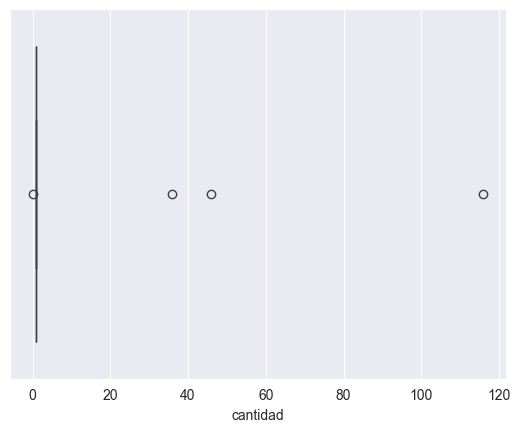

In [348]:
 sns.boxplot(x=df_yawar_c['cantidad'])

In [80]:
df_yawar_c['cantidad'].describe()

count     84.000000
mean       3.309524
std       13.896325
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max      116.000000
Name: cantidad, dtype: float64

In [349]:
df_yawar_c.sort_values(by='cantidad', ascending=False)

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
73,73.0,2022,2022-05-28,difusion redes sociales,virtual,posts en instagram,116,Bolivia,N/A,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
67,67.0,2021,2021-01-12,difusion redes sociales,virtual,artes,46,Bolivia,N/A,Nacional,...,0,0,0,0.0,no aplica,1,0,0.0,Ninguno,0
72,72.0,2022,2022-05-28,difusion redes sociales,virtual,reels,36,Bolivia,N/A,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
61,61.0,2022,2022-05-28,conversatorio,virtual,Conversatorio: \nLA DESIGUALDAD MENSTRUAL Y EL...,1,Bolivia,Internacional,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
59,59.0,2023,2024-05-23,artistica y cultural,presencial,"Performance artística de danza y poesía, Sucre",1,Bolivia,Sucre,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,26.0,2022,2022-05-04,taller,virtual,Voluntarias Yawar,1,Bolivia,La Paz,Nacional,...,0,0,0,210.0,Pobreza menstrual,1,5,480.0,Aptapi Jopueti,0
24,25.0,2022,2022-04-14,taller,virtual,Voluntarias Yawar,1,Bolivia,La Paz,Nacional,...,0,0,0,210.0,"Pubertad, adolescencia y menarquía",1,4,480.0,Aptapi Jopueti,0
23,24.0,2022,2022-03-24,taller,virtual,Voluntarias Yawar,1,Bolivia,El Alto,Nacional,...,0,0,0,210.0,Arte Menstrual,1,5,480.0,Aptapi Jopueti,0
83,83.0,2022,2022-05-27,medios de comunicacion,virtual,radio Encuentro,1,Bolivia,Sucre,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0


##### 'pais' and 'ciudad' columns

In [350]:
df_yawar_c['pais'].value_counts()

pais
Bolivia           82
Australia          1
Estados Unidos     1
Name: count, dtype: int64

In [512]:
df_yawar_c['ciudad'].value_counts()

ciudad
La Paz                     27
N/A                        20
Sucre                      13
Beni                       11
Santa Cruz de la Sierra     9
Cochabamba                  1
Buena Vista                 1
Melbourne                   1
Ciudad de México            1
Name: count, dtype: int64

In [352]:
df_yawar_c[df_yawar_c['ciudad']=='N/A']

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
52,52.0,2021,2021-10-01,artistica y cultural,presencial,Primer Videopitch para campaña de recaudación ...,1,Bolivia,N/A,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
53,53.0,2021,2021-02-06,artistica y cultural,presencial,Un evento de Zumba y conversatorio para recaud...,1,Australia,N/A,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
57,57.0,2022,2022-01-11,artistica y cultural,presencial,Cartilla educativa con ilustraciones,1,Bolivia,N/A,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
65,65.0,2022,2022-03-21,campaña,virtual,Alianza calzones menstruales con Aura,1,Bolivia,N/A,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
67,67.0,2021,2021-01-12,difusion redes sociales,virtual,artes,46,Bolivia,N/A,Nacional,...,0,0,0,0.0,no aplica,1,0,0.0,Ninguno,0
72,72.0,2022,2022-05-28,difusion redes sociales,virtual,reels,36,Bolivia,N/A,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
73,73.0,2022,2022-05-28,difusion redes sociales,virtual,posts en instagram,116,Bolivia,N/A,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
74,74.0,2022,2022-03-25,medios de comunicacion,virtual,Verdad con tinta 2,1,Bolivia,N/A,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
75,75.0,2021,2021-11-16,medios de comunicacion,virtual,Verdad con tinta 1,1,Bolivia,N/A,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
76,76.0,2022,2022-04-28,medios de comunicacion,virtual,Muy Waso,1,Bolivia,N/A,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0


In [511]:
df_yawar_c.loc[df_yawar_c['ciudad'].str.contains('Bolivia', na=False), 'ciudad']='N/A'

In [503]:
#Modification we can determine that city is Ciudad de Mexico
df_yawar_c.loc[df_yawar_c['ciudad']=='Internacional', 'ciudad']='Ciudad de México'

In [508]:
df_yawar_c.loc[df_yawar_c['ciudad']=='Nacional', 'ciudad']='N/A'

In [354]:
#Modification in the 52th row since for 'lugar' we can determine that city is Melbourne
df_yawar_c.loc[df_yawar_c['pais']=='Australia','ciudad']='Melbourne'

In [355]:
#Santa Cruz is Santa Cruz de la Sierra
df_yawar_c.loc[df_yawar_c['ciudad']=='Santa Cruz', 'ciudad']='Santa Cruz de la Sierra'

In [357]:
df_yawar_c.loc[df_yawar_c['ciudad'].str.contains('Santa'), 'ciudad'].unique()

array(['Santa Cruz de la Sierra'], dtype=object)

In [358]:
#El Alto is considered as part of La Paz
df_yawar_c.loc[df_yawar_c['ciudad']=='El Alto', :]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
0,1.0,2022,2022-03-10,taller,presencial,1er encuentro voluntarias,1,Bolivia,El Alto,Nacional,...,0,0,0,210.0,historia de nuestra sexualidad y anatomia,1,0,480.0,No,0
2,3.0,2022,2022-07-07,taller,presencial,ALTO ALDEAS,1,Bolivia,El Alto,Nacional,...,0,20,0,210.0,vivencia menstrual-ovulatoria,1,5,480.0,Aptapi Jopueti,0
3,4.0,2022,2022-07-08,taller,presencial,ALTO ALDEAS,1,Bolivia,El Alto,Nacional,...,1,17,0,210.0,vivencia menstrual-ovulatoria,1,5,480.0,Aptapi Jopueti,100
4,5.0,2022,2022-07-09,taller,presencial,ALTO MAPAKI,1,Bolivia,El Alto,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,3,480.0,Aptapi Jopueti,30
9,10.0,2022,2022-06-24,taller,virtual,ESCUELITA VIRTUAL,1,Bolivia,El Alto,Nacional,...,0,0,0,210.0,historia de nuestra sexualidad y anatomia,1,0,330.0,Ninguno,0
10,11.0,2022,2022-04-14,taller,virtual,ESCUELITA VIRTUAL 2,1,Bolivia,El Alto,Nacional,...,0,0,0,210.0,ciclo en sus 4 fases: sexualidad y hormonas,1,0,480.0,Ninguno,0
11,12.0,2022,2022-05-04,taller,virtual,ESCUELITA VIRTUAL 3,1,Bolivia,El Alto,Nacional,...,0,0,0,210.0,insumos de gestión menstrual,1,0,480.0,Ninguno,0
12,13.0,2022,2022-05-24,taller,virtual,ESCUELITA VIRTUAL 4,1,Bolivia,El Alto,Nacional,...,0,0,0,210.0,vivencia menstrual y la pobreza menstrual.,1,0,480.0,Ninguno,0
13,14.0,2022,2022-06-22,taller,virtual,ESCUELITA VIRTUAL 5,1,Bolivia,El Alto,Nacional,...,0,0,0,210.0,gestión menstrual digna para todas las personas,1,0,480.0,Ninguno,0
14,15.0,2022,2022-07-02,taller,virtual,ESCUELITA VIRTUAL 6,1,Bolivia,El Alto,Nacional,...,0,0,0,210.0,pedagogía menstrual,1,0,480.0,Ninguno,0


In [359]:
df_yawar_c.loc[df_yawar_c['ciudad']=='El Alto', 'localidad']='El Alto'

In [360]:
df_yawar_c.loc[df_yawar_c['ciudad']=='El Alto', 'ciudad']='La Paz'

In [361]:
#Lets review 'diversas ciudades' in city.
df_yawar_c.loc[df_yawar_c['ciudad']=='Diversas ciudades', :]


,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
29,30.0,2022,2022-09-24,taller,virtual,Voluntarias Yawar,1,Bolivia,Diversas ciudades,Nacional,...,0,0,0,210.0,Bienvenida a Yawar,1,10,480.0,Aptapi Jopueti,0
30,31.0,2022,2022-09-28,taller,virtual,Voluntarias Yawar,1,Bolivia,Diversas ciudades,Nacional,...,0,0,0,210.0,El ciclo menstrual,1,10,480.0,Aptapi Jopueti,0
31,32.0,2022,2022-10-05,taller,virtual,Voluntarias Yawar,1,Bolivia,Diversas ciudades,Nacional,...,0,0,0,210.0,Activismo menstrual,1,10,480.0,Aptapi Jopueti,0
32,33.0,2022,2022-10-12,taller,virtual,Voluntarias Yawar,1,Bolivia,Diversas ciudades,Internacional,...,0,0,0,210.0,Justicia Menstrual,1,10,480.0,Aptapi Jopueti,0
38,39.0,2023,2023-03-30,taller,virtual,Rapsistencia,1,Bolivia,Diversas ciudades,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Aptapi Jopueti,0
39,40.0,2023,2023-04-19,taller,virtual,Mujeres Montaña,1,Bolivia,Diversas ciudades,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Aptapi Jopueti,0


In [362]:
df_yawar_c.loc[df_yawar_c['ciudad']=='Diversas ciudades', 'ciudad']='N/A'

In [363]:
#N/A options
df_yawar_c.loc[df_yawar_c['ciudad']=='N/A', :]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
29,30.0,2022,2022-09-24,taller,virtual,Voluntarias Yawar,1,Bolivia,N/A,Nacional,...,0,0,0,210.0,Bienvenida a Yawar,1,10,480.0,Aptapi Jopueti,0
30,31.0,2022,2022-09-28,taller,virtual,Voluntarias Yawar,1,Bolivia,N/A,Nacional,...,0,0,0,210.0,El ciclo menstrual,1,10,480.0,Aptapi Jopueti,0
31,32.0,2022,2022-10-05,taller,virtual,Voluntarias Yawar,1,Bolivia,N/A,Nacional,...,0,0,0,210.0,Activismo menstrual,1,10,480.0,Aptapi Jopueti,0
32,33.0,2022,2022-10-12,taller,virtual,Voluntarias Yawar,1,Bolivia,N/A,Internacional,...,0,0,0,210.0,Justicia Menstrual,1,10,480.0,Aptapi Jopueti,0
38,39.0,2023,2023-03-30,taller,virtual,Rapsistencia,1,Bolivia,N/A,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Aptapi Jopueti,0
39,40.0,2023,2023-04-19,taller,virtual,Mujeres Montaña,1,Bolivia,N/A,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Aptapi Jopueti,0
52,52.0,2021,2021-10-01,artistica y cultural,presencial,Primer Videopitch para campaña de recaudación ...,1,Bolivia,N/A,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
57,57.0,2022,2022-01-11,artistica y cultural,presencial,Cartilla educativa con ilustraciones,1,Bolivia,N/A,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
65,65.0,2022,2022-03-21,campaña,virtual,Alianza calzones menstruales con Aura,1,Bolivia,N/A,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
67,67.0,2021,2021-01-12,difusion redes sociales,virtual,artes,46,Bolivia,N/A,Nacional,...,0,0,0,0.0,no aplica,1,0,0.0,Ninguno,0


In [93]:
#Checking what is in virtual events.
df_yawar_c.loc[df_yawar_c['formato']=='virtual', ['ciudad','localidad']].value_counts()

ciudad                localidad
La Paz                El Alto      13
N/A                   N/A           7
                      Nacional      6
Sucre                 N/A           6
La Paz                Nacional      3
Bolivia y Nueva York  N/A           1
Internacional         N/A           1
Nacional              N/A           1
Name: count, dtype: int64

#### 'alcance' column

In [364]:
df_yawar_c['alcance'].value_counts()

alcance
Nacional         73
Internacional    10
La Paz            1
Name: count, dtype: int64

Since La Paz is not a category for this column should be revised.

In [365]:
df_yawar_c[df_yawar_c['alcance']=='La Paz']

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
1,2.0,2022,2022-04-09,taller,presencial,Taller: qué es ser joven?,1,Bolivia,La Paz,La Paz,...,0,0,0,210.0,Qué es ser joven?,2,0,400.0,No,5


In [366]:
df_yawar_c.loc[df_yawar_c['alcance']=='La Paz','alcance']='Nacional'

#### 'localidad' column

In [367]:
df_yawar_c['localidad'].value_counts()

localidad
N/A                                   23
El Alto                               19
Nacional                               9
Santa Rosa Yacuma                      7
Santa Cruz                             5
La Paz                                 4
Santa Rosa Yacuma, Beni                4
Sucre                                  4
distrito 6 Sucre                       3
Buena Vista                            2
Santa Cruz de la Sierra                1
Plan 3000, Santa Cruz de la Sierra     1
Colcapirhua                            1
Alonso Gutierrez                       1
Name: count, dtype: int64

In [368]:
df_yawar_c[df_yawar_c['localidad']=='Nacional']

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
22,23.0,2022,2022-03-03,taller,virtual,Voluntarias Yawar,1,Bolivia,La Paz,Nacional,...,0,0,0,210.0,Poblaciones Vulnerables,1,5,480.0,Aptapi Jopueti,0
24,25.0,2022,2022-04-14,taller,virtual,Voluntarias Yawar,1,Bolivia,La Paz,Nacional,...,0,0,0,210.0,"Pubertad, adolescencia y menarquía",1,4,480.0,Aptapi Jopueti,0
25,26.0,2022,2022-05-04,taller,virtual,Voluntarias Yawar,1,Bolivia,La Paz,Nacional,...,0,0,0,210.0,Pobreza menstrual,1,5,480.0,Aptapi Jopueti,0
29,30.0,2022,2022-09-24,taller,virtual,Voluntarias Yawar,1,Bolivia,N/A,Nacional,...,0,0,0,210.0,Bienvenida a Yawar,1,10,480.0,Aptapi Jopueti,0
30,31.0,2022,2022-09-28,taller,virtual,Voluntarias Yawar,1,Bolivia,N/A,Nacional,...,0,0,0,210.0,El ciclo menstrual,1,10,480.0,Aptapi Jopueti,0
31,32.0,2022,2022-10-05,taller,virtual,Voluntarias Yawar,1,Bolivia,N/A,Nacional,...,0,0,0,210.0,Activismo menstrual,1,10,480.0,Aptapi Jopueti,0
32,33.0,2022,2022-10-12,taller,virtual,Voluntarias Yawar,1,Bolivia,N/A,Internacional,...,0,0,0,210.0,Justicia Menstrual,1,10,480.0,Aptapi Jopueti,0
38,39.0,2023,2023-03-30,taller,virtual,Rapsistencia,1,Bolivia,N/A,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Aptapi Jopueti,0
39,40.0,2023,2023-04-19,taller,virtual,Mujeres Montaña,1,Bolivia,N/A,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Aptapi Jopueti,0


Since there is a column 'alcance' with 'Nacional' as a value, this does not corresond here.

In [369]:
df_yawar_c.loc[df_yawar_c['localidad']=='Nacional','localidad']='N/A'

Mostly when 'localidad' column equals 'N/A' then it refers to a virtual activity or an artistic one. 

In [370]:
df_yawar_c[df_yawar_c['localidad']=='N/A']

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
22,23.0,2022,2022-03-03,taller,virtual,Voluntarias Yawar,1,Bolivia,La Paz,Nacional,...,0,0,0,210.0,Poblaciones Vulnerables,1,5,480.0,Aptapi Jopueti,0
24,25.0,2022,2022-04-14,taller,virtual,Voluntarias Yawar,1,Bolivia,La Paz,Nacional,...,0,0,0,210.0,"Pubertad, adolescencia y menarquía",1,4,480.0,Aptapi Jopueti,0
25,26.0,2022,2022-05-04,taller,virtual,Voluntarias Yawar,1,Bolivia,La Paz,Nacional,...,0,0,0,210.0,Pobreza menstrual,1,5,480.0,Aptapi Jopueti,0
29,30.0,2022,2022-09-24,taller,virtual,Voluntarias Yawar,1,Bolivia,N/A,Nacional,...,0,0,0,210.0,Bienvenida a Yawar,1,10,480.0,Aptapi Jopueti,0
30,31.0,2022,2022-09-28,taller,virtual,Voluntarias Yawar,1,Bolivia,N/A,Nacional,...,0,0,0,210.0,El ciclo menstrual,1,10,480.0,Aptapi Jopueti,0
31,32.0,2022,2022-10-05,taller,virtual,Voluntarias Yawar,1,Bolivia,N/A,Nacional,...,0,0,0,210.0,Activismo menstrual,1,10,480.0,Aptapi Jopueti,0
32,33.0,2022,2022-10-12,taller,virtual,Voluntarias Yawar,1,Bolivia,N/A,Internacional,...,0,0,0,210.0,Justicia Menstrual,1,10,480.0,Aptapi Jopueti,0
38,39.0,2023,2023-03-30,taller,virtual,Rapsistencia,1,Bolivia,N/A,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Aptapi Jopueti,0
39,40.0,2023,2023-04-19,taller,virtual,Mujeres Montaña,1,Bolivia,N/A,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Aptapi Jopueti,0
52,52.0,2021,2021-10-01,artistica y cultural,presencial,Primer Videopitch para campaña de recaudación ...,1,Bolivia,N/A,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0


In [374]:
df_yawar_c[df_yawar_c['localidad']!='N/A'][['localidad','ciudad']].value_counts()

localidad                ciudad                 
El Alto                  La Paz                     19
Santa Rosa Yacuma        Beni                       11
Santa Cruz de la Sierra  Santa Cruz de la Sierra     6
La Paz                   La Paz                      4
Sucre                    Sucre                       4
distrito 6 Sucre         Sucre                       3
Alonso Gutierrez         Santa Cruz de la Sierra     1
Buena Vista              Buena Vista                 1
                         Santa Cruz de la Sierra     1
Colcapirhua              Cochabamba                  1
Plan 3000                Santa Cruz de la Sierra     1
Name: count, dtype: int64

In [372]:
df_yawar_c.loc[:,'localidad']=df_yawar_c['localidad'].str.split(',').str[0]

In [373]:
#Unify repeated values 
df_yawar_c.loc[df_yawar_c['localidad']=='Santa Cruz','localidad']='Santa Cruz de la Sierra'

In [375]:
#Santa Rosa Yacuma should be replaced with Santa Rosa del Yacuma
df_yawar_c[df_yawar_c['localidad']=='Santa Rosa Yacuma']

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
5,6.0,2022,2023-09-06,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Proyecto Social Jasayé,0
6,7.0,2022,2022-09-08,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Proyecto Social Jasayé,0
7,8.0,2022,2022-09-12,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Proyecto Social Jasayé,0
8,9.0,2022,2022-09-15,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Proyecto Social Jasayé,0
34,35.0,2023,2023-03-01,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Proyecto Social Jasayé,0
35,36.0,2023,2023-03-06,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Proyecto Social Jasayé,0
36,37.0,2023,2023-03-09,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Proyecto Social Jasayé,0
43,44.0,2023,2023-06-17,taller,presencial,UE,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Proyecto Social Jasaye,0
44,45.0,2023,2023-06-24,taller,presencial,MAMAS,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Proyecto Social Jasaye,0
45,46.0,2023,2023-09-13,taller,presencial,COSTURA TOALLAS,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,1,330.0,Proyecto Social Jasaye y Aptapi Jopueti,0


In [376]:
df_yawar_c.loc[df_yawar_c['localidad']=='Santa Rosa Yacuma','localidad']='Santa Rosa del Yacuma'

In [378]:
# La Paz is a 'ciudad' not a 'localidad'
df_yawar_c[(df_yawar_c['localidad']=='La Paz') & (df_yawar_c['ciudad']=='El Alto')]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa


In [379]:
df_yawar_c.loc[(df_yawar_c['localidad']=='La Paz') & (df_yawar_c['ciudad']=='El Alto'),'localidad']='El Alto'

In [380]:
# For 'El Alto' as localidad then city is 'La Paz'
df_yawar_c.loc[(df_yawar_c['localidad']=='El Alto'),'ciudad']='La Paz'

In [381]:
#Plan 3000 is part of santa cruz de la sierra
df_yawar_c.loc[(df_yawar_c['localidad']=='Plan 3000'),'localidad']='Santa Cruz de la Sierra'

In [382]:
#Distrito 6 Sucre is part of Sucre
df_yawar_c.loc[(df_yawar_c['localidad']=='distrito 6 Sucre'),'localidad']='Sucre'

In [383]:
df_yawar_c.tail()

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
79,79.0,2023,2023-03-22,medios de comunicacion,presencial,Agencia EFE,1,Bolivia,N/A,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
80,80.0,2023,2023-09-16,medios de comunicacion,presencial,Nacer Mujer TV,1,Bolivia,La Paz,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
81,81.0,2022,2022-04-13,medios de comunicacion,virtual,Adich Radio,1,Bolivia,Sucre,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
82,82.0,2022,2022-07-19,medios de comunicacion,virtual,Adich Radio,1,Bolivia,Sucre,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0
83,83.0,2022,2022-05-27,medios de comunicacion,virtual,radio Encuentro,1,Bolivia,Sucre,Nacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0


'lugar' column

In [384]:
df_yawar_c['lugar'].value_counts()

lugar
N/A                                          24
diversas ciudades                            14
Instalaciones PSJ                            11
El Alto                                       6
UNIFRANZ EL ALTO                              2
Penal Juvenil                                 2
Café AMTA                                     1
Casa Carmen                                   1
Australia, Melbourne                          1
Micelio                                       1
CERPI                                         1
Mercado central                               1
CERPI y Mercado Central                       1
Rio Selva                                     1
Universidad Gabriel René Moreno               1
México                                        1
UNIFRANZ                                      1
Hogar de acogida                              1
Instalaciones CIES                            1
Centro de Rehabilitación Palmasola            1
Centro de Salud Alonso Gutierrez  

In [385]:
df_yawar_c.loc[df_yawar_c['lugar']!='N/A',:]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
0,1.0,2022,2022-03-10,taller,presencial,1er encuentro voluntarias,1,Bolivia,La Paz,Nacional,...,0,0,0,210.0,historia de nuestra sexualidad y anatomia,1,0,480.0,No,0
1,2.0,2022,2022-04-09,taller,presencial,Taller: qué es ser joven?,1,Bolivia,La Paz,Nacional,...,0,0,0,210.0,Qué es ser joven?,2,0,400.0,No,5
2,3.0,2022,2022-07-07,taller,presencial,ALTO ALDEAS,1,Bolivia,La Paz,Nacional,...,0,20,0,210.0,vivencia menstrual-ovulatoria,1,5,480.0,Aptapi Jopueti,0
3,4.0,2022,2022-07-08,taller,presencial,ALTO ALDEAS,1,Bolivia,La Paz,Nacional,...,1,17,0,210.0,vivencia menstrual-ovulatoria,1,5,480.0,Aptapi Jopueti,100
4,5.0,2022,2022-07-09,taller,presencial,ALTO MAPAKI,1,Bolivia,La Paz,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,3,480.0,Aptapi Jopueti,30
5,6.0,2022,2023-09-06,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Proyecto Social Jasayé,0
6,7.0,2022,2022-09-08,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Proyecto Social Jasayé,0
7,8.0,2022,2022-09-12,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Proyecto Social Jasayé,0
8,9.0,2022,2022-09-15,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Proyecto Social Jasayé,0
9,10.0,2022,2022-06-24,taller,virtual,ESCUELITA VIRTUAL,1,Bolivia,La Paz,Nacional,...,0,0,0,210.0,historia de nuestra sexualidad y anatomia,1,0,330.0,Ninguno,0


In [386]:
#Its important to highlight that Mexico was part of onw activity
df_yawar_c.loc[df_yawar_c['lugar']=='México',:]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
61,61.0,2022,2022-05-28,conversatorio,virtual,Conversatorio: \nLA DESIGUALDAD MENSTRUAL Y EL...,1,Bolivia,Internacional,Internacional,...,0,0,0,0.0,N/A,1,0,0.0,Ninguno,0


In [387]:
df_yawar_c.loc[df_yawar_c['lugar']=='México','pais']='Estados Unidos Mexicanos'

tipo de area column

In [388]:
df_yawar_c['tipodearea'].value_counts()

tipodearea
urbana        41
rural         14
periurbana     6
Urbana         2
Name: count, dtype: int64

In [389]:
#lower data in tipodearea column. 
df_yawar_c['tipodearea']=df_yawar_c['tipodearea'].str.lower()

tipodeestablecimiento column

In [390]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento']=='México','pais']='Estados Unidos Mexicanos'

In [391]:
df_yawar_c['tipodeestablecimiento'].value_counts()

tipodeestablecimiento
voluntariado                                                          12
Fundación en el área rural                                            11
N/A                                                                   11
prensa escrita                                                         6
escuela                                                                6
medio audiovisual                                                      4
cárcel                                                                 3
ONG adolescencia y juventudes acceso a saliud y ejercicio derechos     3
ONG de chicas en situación de calle                                    2
Escuelita móvil de barrios periurbanos                                 2
Voluntariado y asociación                                              2
ONG por la salud sexual y reproductiva                                 2
Educativo                                                              2
casa                         

In [120]:
df_yawar_c.head(5)

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,calzonesmenstruales,kit_insumos_gestiónmenstrual,q'ipusmenstruales,expo_duracion,tematicataller,expo_personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa
0,1.0,2022,2022-03-10 00:00:00,taller,presencial,1er encuentro voluntarias,1,Bolivia,La Paz,Nacional,...,0,0,No,210.0,historia de nuestra sexualidad y anatomia,1,0,480.0,No,0
1,2.0,2022,2022-04-09 00:00:00,taller,presencial,Taller: qué es ser joven?,1,Bolivia,La Paz,Nacional,...,0,0,No,210.0,Qué es ser joven?,2,0,400.0,No,5
2,3.0,2022,2022-07-07 00:00:00,taller,presencial,ALTO ALDEAS,1,Bolivia,La Paz,Nacional,...,0,20,No,210.0,vivencia menstrual-ovulatoria,1,5,480.0,Aptapi Jopueti,0
3,4.0,2022,2022-07-08 00:00:00,taller,presencial,ALTO ALDEAS,1,Bolivia,La Paz,Nacional,...,1,17,No,210.0,vivencia menstrual-ovulatoria,1,5,480.0,Aptapi Jopueti,100
4,5.0,2022,2022-07-09 00:00:00,taller,presencial,ALTO MAPAKI,1,Bolivia,La Paz,Nacional,...,0,0,No,210.0,vivencia menstrual-ovulatoria,1,3,480.0,Aptapi Jopueti,30


personaslcanzadas column

In [392]:
df_yawar_c['personasalcanzadas_cant'].describe()

count    84.000000
mean      9.119048
std       9.875618
min       0.000000
25%       0.000000
50%       7.500000
75%      15.250000
max      35.000000
Name: personasalcanzadas_cant, dtype: float64

edad column ****- requires to delete 2024. ... values or change those 

In [122]:
df_yawar_c[['edad', 'poblacion']]

,edad,poblacion
0,18-26,Voluntarias Yawar El Alto
1,18-26,Voluntarias Yawar El Alto
2,10-13,chicas huérfanas
3,14-17,chicas en situación de calle
4,12,chicas en situación de calle
...,...,...
79,N/A,poblacion_general
80,N/A,poblacion_general
81,N/A,poblacion_general
82,N/A,poblacion_general


In [393]:
df_yawar_c['poblacion'].value_counts()

poblacion
poblacion_general                               34
adolescentes y jóvener rurales                  12
mujeres voluntarias                             12
Voluntarias Yawar El Alto                        8
jóvenes privadas de libertad                     2
chicas en situación de calle                     2
voluntarias adolescentes                         2
mujeres rurales                                  2
niñas trabajadoras de calle                      1
adolescentes y jóvenes trabajadoras de calle     1
niñas y adolescentes periurbanas                 1
chicas huérfanas                                 1
mujeres con discapacidad                         1
mujeres artistas                                 1
mujeres rurales escaladoras                      1
mujeres reclusas                                 1
adolescentes                                     1
adolescentes extranjeras                         1
Name: count, dtype: int64

vulnerabilidad column

In [394]:
df_yawar_c['vulnerabilidad'].value_counts()

vulnerabilidad
N/A    34
No     25
Si     25
Name: count, dtype: int64

In [395]:
df_yawar_c['vulnerabilidad']=df_yawar_c['vulnerabilidad'].str.lower()

In [396]:
df_yawar_c.loc[df_yawar_c['vulnerabilidad']=='n/a','vulnerabilidad']='N/A'

dotacióninsumos column

In [397]:
df_yawar_c['dotacióninsumos'].value_counts()

dotacióninsumos
No     38
N/A    34
Sí     11
SI      1
Name: count, dtype: int64

In [398]:
df_yawar_c['dotacióninsumos']=df_yawar_c['dotacióninsumos'].str.lower()

In [399]:
df_yawar_c.loc[df_yawar_c['dotacióninsumos']=='sí','dotacióninsumos']='si'

In [400]:
df_yawar_c.loc[df_yawar_c['dotacióninsumos']=='n/a','dotacióninsumos']='N/A'

In [401]:
df_yawar_c['toallasdesechables'].value_counts()

toallasdesechables
0      80
5       1
100     1
30      1
94      1
Name: count, dtype: int64

In [402]:
df_yawar_c['copasmenstruales'].value_counts()

copasmenstruales
0    83
8     1
Name: count, dtype: int64

In [403]:
df_yawar_c['toallasreutilizables'].value_counts()

toallasreutilizables
0     80
20     2
26     1
10     1
Name: count, dtype: int64

In [404]:
df_yawar_c['calzonesmenstruales'].value_counts()

calzonesmenstruales
0    83
1     1
Name: count, dtype: int64

In [405]:
df_yawar_c['kit_insumos_gestiónmenstrual'].value_counts()

kit_insumos_gestiónmenstrual
0     78
20     1
17     1
25     1
26     1
27     1
15     1
Name: count, dtype: int64

In [406]:
df_yawar_c['qipusmenstruales'].value_counts()

qipusmenstruales
0     83
26     1
Name: count, dtype: int64

In [410]:
df_yawar_c['expo_duracion'].value_counts()

expo_duracion
210.0    48
0.0      34
420.0     1
10.0      1
Name: count, dtype: int64

<Axes: xlabel='expo_duracion'>

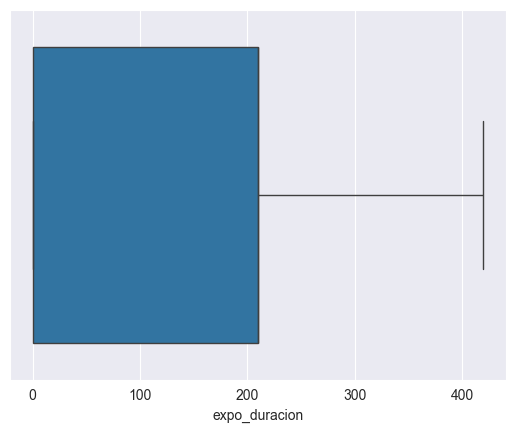

In [411]:
sns.boxplot(x=df_yawar_c['expo_duracion'])

In [412]:
df_yawar_c['tematicataller'].value_counts()

tematicataller
N/A                                                                      33
vivencia menstrual-ovulatoria                                            27
historia de nuestra sexualidad y anatomia                                 2
Pobreza menstrual                                                         1
Ciclicidad Menstrual-Ovulatoria y registro del ciclo menstrual            1
vivencia menstrual-ovulatoria y trabajo del Proyecto Yawar en Bolivia     1
Justicia Menstrual                                                        1
Activismo menstrual                                                       1
El ciclo menstrual                                                        1
Bienvenida a Yawar                                                        1
Gestión y pedagogía menstrual                                             1
Políticas Públicas                                                        1
Ciclo menstrual                                                          

In [413]:
df_yawar_c.loc[df_yawar_c['tematicataller']=='no aplica','tematicataller']='N/A'

In [415]:
df_yawar_c['personal'].value_counts()

personal
1    80
2     3
4     1
Name: count, dtype: int64

In [416]:
df_yawar_c['voluntarias'].value_counts()

voluntarias
0     57
1      7
5      6
10     4
3      3
2      3
4      3
6      1
Name: count, dtype: int64

In [417]:
df_yawar_c['expo_tiempo_elabtaller'].value_counts()

expo_tiempo_elabtaller
0.0      32
330.0    27
480.0    21
400.0     2
360.0     1
300.0     1
Name: count, dtype: int64

In [418]:
df_yawar_c['org_apoyo'].value_counts()

org_apoyo
Ninguno                                    40
Aptapi Jopueti                             22
Proyecto Social Jasayé                      7
Micros para Avanzar                         3
Proyecto Social Jasaye                      3
No                                          2
Etta Projects                               2
Dragones                                    1
Proyecto Social Jasaye y Aptapi Jopueti     1
CIES                                        1
Munasim Killakita                           1
Fondo Apthapi                               1
Name: count, dtype: int64

In [419]:
df_yawar_c.loc[df_yawar_c['org_apoyo']=='No','org_apoyo']='Ninguno'

## Feature Engineer

Its required to have tipodeestablecimiento column well categorized, so another column will be added to display a possible solution.

In [420]:
df_yawar_c['tipodeestablecimiento'].value_counts()

tipodeestablecimiento
voluntariado                                                          12
Fundación en el área rural                                            11
N/A                                                                   11
prensa escrita                                                         6
escuela                                                                6
medio audiovisual                                                      4
cárcel                                                                 3
ONG adolescencia y juventudes acceso a saliud y ejercicio derechos     3
ONG de chicas en situación de calle                                    2
Escuelita móvil de barrios periurbanos                                 2
Voluntariado y asociación                                              2
ONG por la salud sexual y reproductiva                                 2
Educativo                                                              2
casa                         

In [421]:
df_yawar_c['tipodeestablecimiento_cat']=df_yawar_c['tipodeestablecimiento']

In [422]:
df_yawar_c[df_yawar_c['tipodeestablecimiento_cat']=='no aplica']

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa,tipodeestablecimiento_cat


In [423]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat']=='no aplica','tipodeestablecimiento_cat']='N/A'

In [424]:
df_yawar_c['tipodeestablecimiento_cat'].value_counts()

tipodeestablecimiento_cat
voluntariado                                                          12
Fundación en el área rural                                            11
N/A                                                                   11
prensa escrita                                                         6
escuela                                                                6
medio audiovisual                                                      4
cárcel                                                                 3
ONG adolescencia y juventudes acceso a saliud y ejercicio derechos     3
ONG de chicas en situación de calle                                    2
Escuelita móvil de barrios periurbanos                                 2
Voluntariado y asociación                                              2
ONG por la salud sexual y reproductiva                                 2
Educativo                                                              2
casa                     

In [425]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].isna(), 'tipodeestablecimiento_cat']='N/A'

Categorize tipodeestablecimiento in broad categories

In [426]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].str.contains('ONG'),'tipodeestablecimiento_cat']='ONG'

In [427]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].str.contains('rural'),'tipodeestablecimiento_cat']

5     Fundación en el área rural
6     Fundación en el área rural
7     Fundación en el área rural
8     Fundación en el área rural
34    Fundación en el área rural
35    Fundación en el área rural
36    Fundación en el área rural
43    Fundación en el área rural
44    Fundación en el área rural
45    Fundación en el área rural
46    Fundación en el área rural
Name: tipodeestablecimiento_cat, dtype: object

In [428]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].str.contains('Fundación en el área rural'),'tipodeestablecimiento_cat']='Fundación'

In [429]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].str.contains('Escu'),'tipodeestablecimiento_cat']

18    Escuelita móvil de barrios periurbanos
19    Escuelita móvil de barrios periurbanos
Name: tipodeestablecimiento_cat, dtype: object

In [430]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].str.contains('Escuelita móvil de barrios periurbanos'),'tipodeestablecimiento_cat']='escuela'

In [431]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].str.contains('socia'),:]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa,tipodeestablecimiento_cat
37,38.0,2023,2023-03-11,taller,presencial,MUJERES DIVERSAS LP,1,Bolivia,La Paz,Nacional,...,0,0,210.0,vivencia menstrual-ovulatoria,1,3,330.0,Aptapi Jopueti,0,Asociación
38,39.0,2023,2023-03-30,taller,virtual,Rapsistencia,1,Bolivia,N/A,Nacional,...,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Aptapi Jopueti,0,Voluntariado y asociación
39,40.0,2023,2023-04-19,taller,virtual,Mujeres Montaña,1,Bolivia,N/A,Nacional,...,0,0,210.0,vivencia menstrual-ovulatoria,1,0,330.0,Aptapi Jopueti,0,Voluntariado y asociación


In [432]:
df_yawar_c.loc[df_yawar_c['formato']=='virtual', 'tipodeestablecimiento_cat']='N/A'

In [433]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].str.contains('Viaje'),:]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa,tipodeestablecimiento_cat
33,34.0,2023,2022-02-24,taller,presencial,DRAGONAS,1,Bolivia,Cochabamba,Internacional,...,0,0,420.0,vivencia menstrual-ovulatoria y trabajo del Pr...,1,0,480.0,Dragones,0,Viaje cultural de jóvenas extranjeras en Bolivia


Viaje cultural de jóvenas extranjeras en Bolivia is the activity 

In [434]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].str.contains('Viaje'),'actividad']='Viaje cultural de jóvenas extranjeras en Bolivia'

In [435]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].str.contains('Viaje'),'tipodeestablecimiento_cat']='Campo'

In [436]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].str.contains('Asoc'),:]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa,tipodeestablecimiento_cat
37,38.0,2023,2023-03-11,taller,presencial,MUJERES DIVERSAS LP,1,Bolivia,La Paz,Nacional,...,0,0,210.0,vivencia menstrual-ovulatoria,1,3,330.0,Aptapi Jopueti,0,Asociación


In [437]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].str.contains('Asoc'),'tipodeestablecimiento_cat']='Universidad'

In [438]:
df_yawar_c['tipodeestablecimiento_cat'].value_counts()

tipodeestablecimiento_cat
N/A                                                 49
Fundación                                           11
ONG                                                  9
cárcel                                               3
prensa escrita                                       3
escuela                                              2
cafeteria                                            1
casa                                                 1
Campo                                                1
Universidad                                          1
Lugar de acogida de víctimas de violencia sexual     1
Educativo                                            1
medio audiovisual                                    1
Name: count, dtype: int64

In [439]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].str.contains('Educ'),:]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa,tipodeestablecimiento_cat
60,60.0,2023,2024-05-23,conversatorio,presencial,Conversatorio UAGRAM en conmemoración del día ...,1,Bolivia,Santa Cruz de la Sierra,Nacional,...,0,0,0.0,N/A,1,0,0.0,Ninguno,0,Educativo


In [440]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].str.contains('Educ'),'tipodeestablecimiento_cat']='Universidad'

In [441]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].str.contains('medio'),:]

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa,tipodeestablecimiento_cat
80,80.0,2023,2023-09-16,medios de comunicacion,presencial,Nacer Mujer TV,1,Bolivia,La Paz,Nacional,...,0,0,0.0,N/A,1,0,0.0,Ninguno,0,medio audiovisual


In [442]:
df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat'].str.contains('medio'),'tipodeestablecimiento_cat']='Canal de Televisión'

In [443]:
df_yawar_c['tipodeestablecimiento_cat']=df_yawar_c.loc[df_yawar_c['tipodeestablecimiento_cat']!='N/A','tipodeestablecimiento_cat'].str.lower()

In [444]:
df_yawar_c[df_yawar_c['edad']=='N/A']

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,kit_insumos_gestiónmenstrual,qipusmenstruales,expo_duracion,tematicataller,personal,voluntarias,expo_tiempo_elabtaller,org_apoyo,toallasdesechablesa,tipodeestablecimiento_cat
50,50.0,2023,2023-08-08,difusion,presencial,Feria Internacional del Libro 2023,1,Bolivia,La Paz,Nacional,...,0,0,0.0,N/A,1,2,0.0,Ninguno,0,NaN
51,51.0,2023,2023-09-28,difusion,presencial,Feria Bulliciosa de la Campaña 28 de Septiembre,1,Bolivia,Santa Cruz de la Sierra,Nacional,...,0,0,0.0,N/A,1,1,0.0,Ninguno,0,NaN
52,52.0,2021,2021-10-01,artistica y cultural,presencial,Primer Videopitch para campaña de recaudación ...,1,Bolivia,N/A,Internacional,...,0,0,0.0,N/A,1,0,0.0,Ninguno,0,NaN
53,53.0,2021,2021-02-06,artistica y cultural,presencial,Un evento de Zumba y conversatorio para recaud...,1,Australia,Melbourne,Internacional,...,0,0,0.0,N/A,1,0,0.0,Ninguno,0,NaN
54,54.0,2021,2021-03-26,artistica y cultural,presencial,"Yawar Twerk, taller de twerk para recaudar fondos",1,Bolivia,Sucre,Nacional,...,0,0,0.0,N/A,1,0,0.0,Ninguno,0,NaN
55,55.0,2021,2021-02-25,artistica y cultural,presencial,Concierto Hip Hoppas y furiosas para recaudaci...,1,Bolivia,La Paz,Nacional,...,0,0,0.0,N/A,1,0,0.0,Ninguno,0,NaN
56,56.0,2022,2022-01-10,artistica y cultural,presencial,"Elaboración de un mural menstrual, de 30 metro...",1,Bolivia,Sucre,Nacional,...,0,0,0.0,N/A,1,0,0.0,Ninguno,0,NaN
57,57.0,2022,2022-01-11,artistica y cultural,presencial,Cartilla educativa con ilustraciones,1,Bolivia,N/A,Nacional,...,0,0,0.0,N/A,1,0,0.0,Ninguno,0,NaN
58,58.0,2023,2023-05-28,artistica y cultural,presencial,Un hip hop menstrual con su videoclip en el mural,1,Bolivia,Sucre,Nacional,...,0,0,0.0,N/A,1,0,0.0,Ninguno,0,NaN
59,59.0,2023,2024-05-23,artistica y cultural,presencial,"Performance artística de danza y poesía, Sucre",1,Bolivia,Sucre,Nacional,...,0,0,0.0,N/A,1,0,0.0,Ninguno,0,NaN


In [445]:
df_yawar_c.loc[df_yawar_c['edad']=='no aplica','edad']='N/A'

In [446]:
df_yawar_c['edad'].value_counts()

edad
N/A                    34
18-36                   7
18-25                   6
18-35                   5
15-17                   4
13-17                   3
2024-12-10 00:00:00     2
14-17                   2
25-50                   2
20-40                   2
13-14                   2
18-26                   2
11-16                   2
10-13                   1
10-14                   1
18-50                   1
20-28                   1
10-16                   1
12                      1
24-45                   1
11-13                   1
2024-12-11 00:00:00     1
12-17                   1
16-18                   1
Name: count, dtype: int64

In [457]:
df_yawar_c.loc[~df_yawar_c['edad'].str.contains('-', na=False), 'edad']

4                      12
5     2024-12-10 00:00:00
8     2024-12-11 00:00:00
34    2024-12-10 00:00:00
50                    N/A
51                    N/A
52                    N/A
53                    N/A
54                    N/A
55                    N/A
56                    N/A
57                    N/A
58                    N/A
59                    N/A
60                    N/A
61                    N/A
62                    N/A
63                    N/A
64                    N/A
65                    N/A
66                    N/A
67                    N/A
68                    N/A
69                    N/A
70                    N/A
71                    N/A
72                    N/A
73                    N/A
74                    N/A
75                    N/A
76                    N/A
77                    N/A
78                    N/A
79                    N/A
80                    N/A
81                    N/A
82                    N/A
83                    N/A
Name: edad, 

In [459]:
df_yawar_c.loc[4,'edad']='12-12'

In [460]:
df_yawar_c.loc[[5,34],'edad']='10-12'

In [461]:
df_yawar_c.loc[[8],'edad']='11-12'

Adding another column to establish ranges within group ages

In [462]:
df_yawar_c['edad'].value_counts()

edad
N/A      34
18-36     7
18-25     6
18-35     5
15-17     4
13-17     3
10-12     2
14-17     2
25-50     2
20-40     2
13-14     2
18-26     2
11-16     2
10-13     1
10-14     1
18-50     1
20-28     1
10-16     1
12-12     1
24-45     1
11-13     1
11-12     1
12-17     1
16-18     1
Name: count, dtype: int64

It has been important to stablish a difference among certaing age groups, accorsingly to this thematic this clasification was done. 

In [481]:
df_yawar_c['9-11'] = 0
df_yawar_c['12-14'] = 0 
df_yawar_c['15-24'] = 0
df_yawar_c['25-47'] = 0
df_yawar_c['48-100'] = 0

In [485]:
df_yawar_c.tail()

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,toallasdesechablesa,tipodeestablecimiento_cat,edad_init,edad_fin,AgeGroup_edad_init,9-11,12-14,15-24,25-47,48-100
79,79.0,2023,2023-03-22,medios de comunicacion,presencial,Agencia EFE,1,Bolivia,N/A,Internacional,...,0,prensa escrita,0,NaN,NaN,0,0,0,0,0
80,80.0,2023,2023-09-16,medios de comunicacion,presencial,Nacer Mujer TV,1,Bolivia,La Paz,Nacional,...,0,canal de televisión,0,NaN,NaN,0,0,0,0,0
81,81.0,2022,2022-04-13,medios de comunicacion,virtual,Adich Radio,1,Bolivia,Sucre,Nacional,...,0,NaN,0,NaN,NaN,0,0,0,0,0
82,82.0,2022,2022-07-19,medios de comunicacion,virtual,Adich Radio,1,Bolivia,Sucre,Nacional,...,0,NaN,0,NaN,NaN,0,0,0,0,0
83,83.0,2022,2022-05-27,medios de comunicacion,virtual,radio Encuentro,1,Bolivia,Sucre,Nacional,...,0,NaN,0,NaN,NaN,0,0,0,0,0


In [464]:
df_yawar_c['edad_init']=None
df_yawar_c['edad_fin']=None

In [486]:
df_yawar_c['edad'].str.split('-').str[0]

0      18
1      18
2      10
3      14
4      12
     ... 
79    N/A
80    N/A
81    N/A
82    N/A
83    N/A
Name: edad, Length: 84, dtype: object

In [487]:
df_yawar_c['edad'].str.split('-').str[1]

0      26
1      26
2      13
3      17
4      12
     ... 
79    NaN
80    NaN
81    NaN
82    NaN
83    NaN
Name: edad, Length: 84, dtype: object

In [488]:
df_yawar_c['edad_init'].isna().sum()

0

In [489]:
df_yawar_c=df_yawar_c.assign(
    edad_init=lambda x:x['edad'].str.split('-').str[0],
    edad_fin=lambda x:x['edad'].str.split('-').str[1]
)

In [490]:
df_yawar_c.head(20)

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,toallasdesechablesa,tipodeestablecimiento_cat,edad_init,edad_fin,AgeGroup_edad_init,9-11,12-14,15-24,25-47,48-100
0,1.0,2022,2022-03-10,taller,presencial,1er encuentro voluntarias,1,Bolivia,La Paz,Nacional,...,0,cafeteria,18,26,3,0,0,0,0,0
1,2.0,2022,2022-04-09,taller,presencial,Taller: qué es ser joven?,1,Bolivia,La Paz,Nacional,...,5,casa,18,26,3,0,0,0,0,0
2,3.0,2022,2022-07-07,taller,presencial,ALTO ALDEAS,1,Bolivia,La Paz,Nacional,...,0,ong,10,13,1,0,0,0,0,0
3,4.0,2022,2022-07-08,taller,presencial,ALTO ALDEAS,1,Bolivia,La Paz,Nacional,...,100,ong,14,17,3,0,0,0,0,0
4,5.0,2022,2022-07-09,taller,presencial,ALTO MAPAKI,1,Bolivia,La Paz,Nacional,...,30,ong,12,12,2,0,0,0,0,0
5,6.0,2022,2023-09-06,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,fundación,10,12,1,0,0,0,0,0
6,7.0,2022,2022-09-08,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,fundación,13,14,2,0,0,0,0,0
7,8.0,2022,2022-09-12,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,fundación,15,17,3,0,0,0,0,0
8,9.0,2022,2022-09-15,taller,presencial,PROYECTO SOCIAL JASAYÉ,1,Bolivia,Beni,Nacional,...,0,fundación,11,12,2,0,0,0,0,0
9,10.0,2022,2022-06-24,taller,virtual,ESCUELITA VIRTUAL,1,Bolivia,La Paz,Nacional,...,0,NaN,18,25,3,0,0,0,0,0


In [469]:
def obtain_range_age(df, edad):
    df.loc[df[edad]=='N/A',edad]=0
    df[edad]=df[edad].astype('int')
    bins=[9,11,14,24,47,51]
    labels=[1,2,3,4,5]
    return pd.cut(df[edad], bins=bins, labels=labels, right=False)

In [471]:
df_yawar_c['AgeGroup_edad_init']=obtain_range_age(df_yawar_c, 'edad_init')

In [478]:
df_yawar_c.sample()

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,27-59,60-100,edad_init,edad_fin,AgeGroup_edad_init,9-11,12-14,15-24,25-47,48-100
12,13.0,2022,2022-05-24,taller,virtual,ESCUELITA VIRTUAL 4,1,Bolivia,La Paz,Nacional,...,None,None,18,25,3,None,None,None,None,None


In [491]:
def choose_group(df):
    for index, row in df.iterrows():
        #val=int(row['AgeGroup_edad_fin']-int(row['AgeGroup_edad_init']))
        #if val ==1: #only there are 2 groups
        if row['AgeGroup_edad_init'] == 1 :
            df.at[index, '9-11'] = row['personasalcanzadas_cant']
        elif row['AgeGroup_edad_init'] == 2:
            df.at[index, '12-14'] = row['personasalcanzadas_cant']
        elif row['AgeGroup_edad_init'] == 3:
            df.at[index, '15-24'] = row['personasalcanzadas_cant']
        elif row['AgeGroup_edad_init'] == 4:
            df.at[index, '25-47'] = row['personasalcanzadas_cant']
        elif row['AgeGroup_edad_init'] == 5:
            df.at[index, '48-100'] = row['personasalcanzadas_cant']         
    return df

In [493]:
df_yawar_c=choose_group(df_yawar_c)

In [494]:
df_yawar_c.sample(10)

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,toallasdesechablesa,tipodeestablecimiento_cat,edad_init,edad_fin,AgeGroup_edad_init,9-11,12-14,15-24,25-47,48-100
20,21.0,2022,2022-08-14,taller,presencial,ETTA Projects,1,Bolivia,Santa Cruz de la Sierra,Nacional,...,0,ong,14,17,3,0,0,25,0,0
59,59.0,2023,2024-05-23,artistica y cultural,presencial,"Performance artística de danza y poesía, Sucre",1,Bolivia,Sucre,Nacional,...,0,NaN,N/A,NaN,NaN,0,0,0,0,0
58,58.0,2023,2023-05-28,artistica y cultural,presencial,Un hip hop menstrual con su videoclip en el mural,1,Bolivia,Sucre,Nacional,...,0,NaN,N/A,NaN,NaN,0,0,0,0,0
1,2.0,2022,2022-04-09,taller,presencial,Taller: qué es ser joven?,1,Bolivia,La Paz,Nacional,...,5,casa,18,26,3,0,0,5,0,0
33,34.0,2023,2022-02-24,taller,presencial,Viaje cultural de jóvenas extranjeras en Bolivia,1,Bolivia,Cochabamba,Internacional,...,0,campo,16,18,3,0,0,20,0,0
25,26.0,2022,2022-05-04,taller,virtual,Voluntarias Yawar,1,Bolivia,La Paz,Nacional,...,0,NaN,18,35,3,0,0,8,0,0
30,31.0,2022,2022-09-28,taller,virtual,Voluntarias Yawar,1,Bolivia,N/A,Nacional,...,0,NaN,18,36,3,0,0,8,0,0
49,NaN,2024,2024-04-13,taller,presencial,Taller,1,Bolivia,La Paz,Nacional,...,0,lugar de acogida de víctimas de violencia sexual,12,17,2,0,26,0,0,0
72,72.0,2022,2022-05-28,difusion redes sociales,virtual,reels,36,Bolivia,N/A,Internacional,...,0,NaN,N/A,NaN,NaN,0,0,0,0,0
22,23.0,2022,2022-03-03,taller,virtual,Voluntarias Yawar,1,Bolivia,La Paz,Nacional,...,0,NaN,18,35,3,0,0,10,0,0


Vulnerability analysis

In [520]:
df_yawar_c.head()
            

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,org_apoyo,tipodeestablecimiento_cat,edad_init,edad_fin,AgeGroup_edad_init,9-11,12-14,15-24,25-47,48-100
0,1.0,2022,2022-03-10,taller,presencial,1er encuentro voluntarias,1,Bolivia,La Paz,Nacional,...,Ninguno,cafeteria,18,26,3,0,0,5,0,0
1,2.0,2022,2022-04-09,taller,presencial,Taller: qué es ser joven?,1,Bolivia,La Paz,Nacional,...,Ninguno,casa,18,26,3,0,0,5,0,0
2,3.0,2022,2022-07-07,taller,presencial,ALTO ALDEAS,1,Bolivia,La Paz,Nacional,...,Aptapi Jopueti,ong,10,13,1,20,0,0,0,0
3,4.0,2022,2022-07-08,taller,presencial,ALTO ALDEAS,1,Bolivia,La Paz,Nacional,...,Aptapi Jopueti,ong,14,17,3,0,0,17,0,0
4,5.0,2022,2022-07-09,taller,presencial,ALTO MAPAKI,1,Bolivia,La Paz,Nacional,...,Aptapi Jopueti,ong,12,12,2,0,30,0,0,0


In [495]:
df_yawar_c.groupby(['vulnerabilidad','poblacion']).count()

#  año  fecha  \
vulnerabilidad poblacion                                                      
N/A            poblacion_general                             34   34     34   
no             Voluntarias Yawar El Alto                      8    8      8   
               adolescentes extranjeras                       1    1      1   
               mujeres artistas                               1    1      1   
               mujeres rurales escaladoras                    1    1      1   
               mujeres voluntarias                           12   12     12   
               voluntarias adolescentes                       2    2      2   
si             adolescentes                                   0    1      1   
               adolescentes y jóvener rurales                12   12     12   
               adolescentes y jóvenes trabajadoras de calle   1    1      1   
               chicas en situación de calle                   2    2      2   
               chicas huérfanas                               1    1      1   
               jóvenes privadas de libertad                   2    2      2   
               mujeres con discapacidad                       1    1      1   
               mujeres reclusas                               1    1      1   
               mujeres rurales                                2    2      2   
               niñas trabajadoras de calle                    1    1      1   
               niñas y adolescentes periurbanas               1    1      1   

                                                             tipo_actividad  \
vulnerabilidad poblacion                                                      
N/A            poblacion_general                                         34   
no             Voluntarias Yawar El Alto                                  8   
               adolescentes extranjeras                                   1   
               mujeres artistas                                           1   
               mujeres rurales escaladoras                                1   
               mujeres voluntarias                                       12   
               voluntarias adolescentes                                   2   
si             adolescentes                                               1   
               adolescentes y jóvener rurales                            12   
               adolescentes y jóvenes trabajadoras de calle               1   
               chicas en situación de calle                               2   
               chicas huérfanas                                           1   
               jóvenes privadas de libertad                               2   
               mujeres con discapacidad                                   1   
               mujeres reclusas                                           1   
               mujeres rurales                                            2   
               niñas trabajadoras de calle                                1   
               niñas y adolescentes periurbanas                           1   

                                                             formato  \
vulnerabilidad poblacion                                               
N/A            poblacion_general                                  34   
no             Voluntarias Yawar El Alto                           8   
               adolescentes extranjeras                            1   
               mujeres artistas                                    1   
               mujeres rurales escaladoras                         1   
               mujeres voluntarias                                12   
               voluntarias adolescentes                            2   
si             adolescentes                                        1   
               adolescentes y jóvener rurales                     12   
               adolescentes y jóvenes trabajadoras de calle        1   
               chicas en situación d

In [496]:
#lower values in 'poblacion'
df_yawar_c['poblacion']=df_yawar_c['poblacion'].str.lower()

In [518]:
df_yawar_c.head()

,#,año,fecha,tipo_actividad,formato,actividad,cantidad,pais,ciudad,alcance,...,org_apoyo,tipodeestablecimiento_cat,edad_init,edad_fin,AgeGroup_edad_init,9-11,12-14,15-24,25-47,48-100
0,1.0,2022,2022-03-10,taller,presencial,1er encuentro voluntarias,1,Bolivia,La Paz,Nacional,...,Ninguno,cafeteria,18,26,3,0,0,5,0,0
1,2.0,2022,2022-04-09,taller,presencial,Taller: qué es ser joven?,1,Bolivia,La Paz,Nacional,...,Ninguno,casa,18,26,3,0,0,5,0,0
2,3.0,2022,2022-07-07,taller,presencial,ALTO ALDEAS,1,Bolivia,La Paz,Nacional,...,Aptapi Jopueti,ong,10,13,1,20,0,0,0,0
3,4.0,2022,2022-07-08,taller,presencial,ALTO ALDEAS,1,Bolivia,La Paz,Nacional,...,Aptapi Jopueti,ong,14,17,3,0,0,17,0,0
4,5.0,2022,2022-07-09,taller,presencial,ALTO MAPAKI,1,Bolivia,La Paz,Nacional,...,Aptapi Jopueti,ong,12,12,2,0,30,0,0,0


In [199]:
df_yawar_c['tematicataller'].value_counts()

tematicataller
N/A                                                                      34
vivencia menstrual-ovulatoria                                            27
historia de nuestra sexualidad y anatomia                                 2
ciclo en sus 4 fases: sexualidad y hormonas                               1
Ciclo menstrual                                                           1
Ciclicidad Menstrual-Ovulatoria y registro del ciclo menstrual            1
vivencia menstrual-ovulatoria y trabajo del Proyecto Yawar en Bolivia     1
Justicia Menstrual                                                        1
Activismo menstrual                                                       1
El ciclo menstrual                                                        1
Bienvenida a Yawar                                                        1
Gestión y pedagogía menstrual                                             1
Políticas Públicas                                                       

In [200]:
df_yawar_c['org_apoyo'].value_counts()

org_apoyo
Ninguno                                    42
Aptapi Jopueti                             22
Proyecto Social Jasayé                      7
Micros para Avanzar                         3
Proyecto Social Jasaye                      3
Etta Projects                               2
Dragones                                    1
Proyecto Social Jasaye y Aptapi Jopueti     1
CIES                                        1
Munasim Killakita                           1
Fondo Apthapi                               1
Name: count, dtype: int64

In [517]:
df_yawar_c.groupby(['ciudad','localidad']).count()

#  año  fecha  \
ciudad                  localidad                                 
Beni                    Santa Rosa del Yacuma    11   11     11   
Buena Vista             Buena Vista               1    1      1   
Ciudad de México        N/A                       1    1      1   
Cochabamba              Colcapirhua               1    1      1   
La Paz                  El Alto                  18   19     19   
                        La Paz                    4    4      4   
                        N/A                       4    4      4   
Melbourne               N/A                       1    1      1   
N/A                     N/A                      20   20     20   
Santa Cruz de la Sierra Alonso Gutierrez          1    1      1   
                        Buena Vista               1    1      1   
                        Santa Cruz de la Sierra   7    7      7   
Sucre                   N/A                       6    6      6   
                        Sucre                     7    7      7   

                                                 tipo_actividad  formato  \
ciudad                  localidad                                          
Beni                    Santa Rosa del Yacuma                11       11   
Buena Vista             Buena Vista                           1        1   
Ciudad de México        N/A                                   1        1   
Cochabamba              Colcapirhua                           1        1   
La Paz                  El Alto                              19       19   
                        La Paz                                4        4   
                        N/A                                   4        4   
Melbourne               N/A                                   1        1   
N/A                     N/A                                  20       20   
Santa Cruz de la Sierra Alonso Gutierrez                      1        1   
                        Buena Vista                           1        1   
                        Santa Cruz de la Sierra               7        7   
Sucre                   N/A                                   6        6   
                        Sucre                                 7        7   

                                                 actividad  cantidad  pais  \
ciudad                  localidad                                            
Beni                    Santa Rosa del Yacuma           11        11    11   
Buena Vista             Buena Vista                      1         1     1   
Ciudad de México        N/A                              1         1     1   
Cochabamba              Colcapirhua                      1         1     1   
La Paz                  El Alto                         19        19    19   
                        La Paz                           4         4     4   
                        N/A                              4         4     4   
Melbourne               N/A                              1         1     1   
N/A                     N/A                             20        20    20   
Santa Cruz de la Sierra Alonso Gutierrez                 1         1     1   
                        Buena Vista                      1         1     1   
                        Santa Cruz de la Sierra          7         7     7   
Sucre                   N/A                              6         6     6   
                        Sucre                            7         7     7   

                                                 alcance  lugar  ...  \
ciudad                  localidad                                ...   
Beni                    Santa Rosa del Yacuma         11     11  ...   
Buena Vista             Buena Vista                    1      1  ...   
Ciudad de México        N/A                            1      1  ...   
Cochabamba              Colcapirhua                    1      1  ...   
La Paz                  El Alto                       19     19  ...   
       

In [519]:
df_yawar_c['vulnerabilidad'].value_counts()

vulnerabilidad
N/A    34
no     25
si     25
Name: count, dtype: int64

In [521]:
path = '../data/yamar_2.2._20240416.csv'
df_yawar_c.to_csv(path, index=False )

In [4]:
final_df = pd.read_csv(path)

In [8]:
final_df.shape

(84, 40)

In [9]:
final_df.columns

Index(['#', 'año', 'fecha', 'tipo_actividad', 'formato', 'actividad',
       'cantidad', 'pais', 'ciudad', 'alcance', 'localidad', 'lugar',
       'tipodearea', 'tipodeestablecimiento', 'personasalcanzadas_cant',
       'edad', 'poblacion', 'vulnerabilidad', 'dotacióninsumos',
       'toallasdesechables', 'copasmenstruales', 'toallasreutilizables',
       'calzonesmenstruales', 'kit_insumos_gestiónmenstrual',
       'qipusmenstruales', 'expo_duracion', 'tematicataller', 'personal',
       'voluntarias', 'expo_tiempo_elabtaller', 'org_apoyo',
       'tipodeestablecimiento_cat', 'edad_init', 'edad_fin',
       'AgeGroup_edad_init', '9-11', '12-14', '15-24', '25-47', '48-100'],
      dtype='object')